In [171]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns

import pytz
from copy import deepcopy
from collections import Counter

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [173]:
train_path = '/content/drive/MyDrive/my_data/kt_network/q2/Q2_train.csv'
test_path = '/content/drive/MyDrive/my_data/kt_network/q2/Q2_test.csv'
submisson_path = '/content/drive/MyDrive/my_data/kt_network/q2/Q2_label_sample.csv'

In [174]:
train = pd.read_csv(train_path)
train

,ticketno,alarmno,alarmtime,alarmlevel,alarmmsg_original,site,sysname,unit,slot,port,sva,root_cause_domain,root_cause_type
0,21122633.0,1669820428245,2022-12-01 00:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A,LinkCut
1,21122633.0,1669821318728,2022-12-01 00:17:15+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A,LinkCut
2,21122633.0,1669822214832,2022-12-01 00:32:11+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A,LinkCut
3,21122633.0,1669823114128,2022-12-01 00:47:10+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A,LinkCut
4,21122633.0,1669824028082,2022-12-01 01:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A,LinkCut
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,21774618.0,1671892499215,2022-12-24 23:37:14+09:00,7,OPT-LOS,AFAA,agow,EQPT,5.0,5.0,NSA,A,LinkCut
9318,15693425.0,877949375,2022-12-25 10:13:46+09:00,7,OPT-REMOVE,AGFD,aibb,EQPT,1.0,8.0,NSA,A,UnitFail
9319,21809789.0,1671974758375,2022-12-25 22:28:14+09:00,7,OPT-LOS,ADKA,aeaq,EQPT,3.0,3.0,NSA,A,LinkCut
9320,21811213.0,1671978167736,2022-12-25 23:25:03+09:00,7,OPT-LOS,ABZO,acie,EQPT,5.0,6.0,NSA,A,LinkCut


In [175]:
test = pd.read_csv(test_path)
test

,ticketno,alarmno,alarmtime,alarmlevel,alarmmsg_original,site,sysname,unit,slot,port,sva,root_cause_domain
0,21812391.0,1671894138838,2022-12-25 00:02:16+09:00,5,Loss Of Signal,AEAQ,afbd,r1sr1sl16/ETHLocPort#15#1,16.0,15.0,NSA,C
1,21775988.0,1671894172511,2022-12-25 00:02:51+09:00,5,Loss Of Signal,ADZW,aezn,r1sr1sl13/ETHLocPort#20#1,13.0,20.0,NSA,C
2,21792259.0,1671894204682,2022-12-25 00:03:22+09:00,4,DDM_RX_PWR_HIGH,AECE,afeg,X2FUA,2.0,1.0,NSA,B
3,21812412.0,1671894215702,2022-12-25 00:03:33+09:00,5,BATT_ENV_FAIL,ACCN,aclp,---,NaN,NaN,SA,B
4,21812417.0,1671894220812,2022-12-25 00:03:39+09:00,5,Loss Of Signal,AEAQ,afbd,r1sr1sl16/ETHLocPort#16#1,16.0,16.0,NSA,C
...,...,...,...,...,...,...,...,...,...,...,...,...
37666,21986223.0,1672412311698,2022-12-30 23:58:30+09:00,5,Loss Of Signal,ADZW,aezn,r1sr1sl13/ETHLocPort#20#1,13.0,20.0,NSA,C
37667,22015278.0,1672412316271,2022-12-30 23:58:33+09:00,4,DDM_RX_PWR_HIGH,AEMD,afsr,G16FU,5.0,6.0,SA,B
37668,21986426.0,1672412317238,2022-12-30 23:58:34+09:00,5,MEP_LSP_RDI,ACMY,acxj,G2FUA,1.0,1.0,NSA,B
37669,22015300.0,1672412373531,2022-12-30 23:59:32+09:00,5,Loss Of Signal,AEAQ,afbd,r1sr1sl16/ETHLocPort#16#1,16.0,16.0,NSA,C


# 변수 분석

### 분석 함수

In [176]:
# 이변량 분석 함수
target = 'root_cause_type'
def num_cat(x, y, data):
    plt.subplot(2,1,1)
    sns.kdeplot(x=x, data=data, hue = y, common_norm=False)
    plt.grid()
    plt.subplot(2,1,2)
    sns.kdeplot(x=x, data=data, hue = y, multiple = 'fill')
    plt.grid()
    plt.tight_layout()
    plt.show()

def cat_cat(x, y, data):
    pd.crosstab(data[x], data[y], normalize='all')
    mosaic(data, [x, y])
    plt.grid()
    plt.show()

    table = pd.crosstab(data[x], data[y])
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('기대빈도\n',result[3])

# 단변량 분석 함수

def eda1_n(var, data, bins=20):

    display(data[[var]].describe().T)

    plt.figure(figsize=(15,10))

    plt.subplot(2,1,1)
    sns.histplot(x=var, data=data, bins=bins, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(x = var, data = data)
    plt.grid()
    plt.show()

def eda1_c(var, data):
    sns.countplot(x=var, data=data)
    plt.grid()
    plt.show()

### root_cause_domain별 데이터 분리하기

In [177]:
test_a = test.loc[test['root_cause_domain'] == 'A']
a = pd.concat([train, test_a], ignore_index=True).drop(columns='root_cause_type')
a

,ticketno,alarmno,alarmtime,alarmlevel,alarmmsg_original,site,sysname,unit,slot,port,sva,root_cause_domain
0,21122633.0,1669820428245,2022-12-01 00:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A
1,21122633.0,1669821318728,2022-12-01 00:17:15+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A
2,21122633.0,1669822214832,2022-12-01 00:32:11+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A
3,21122633.0,1669823114128,2022-12-01 00:47:10+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A
4,21122633.0,1669824028082,2022-12-01 01:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,NSA,A
...,...,...,...,...,...,...,...,...,...,...,...,...
12090,21968655.0,1672409112378,2022-12-30 23:07:32+09:00,5,LSP-LOC,AEOM,afwp,EQPT,1.0,1.0,NSA,A
12091,21968655.0,1672409982810,2022-12-30 23:22:02+09:00,5,LSP-LOC,AEOM,afwp,EQPT,1.0,1.0,NSA,A
12092,21986156.0,1672410376930,2022-12-30 23:28:36+09:00,7,OPT-LOS,ABZO,acie,EQPT,5.0,6.0,NSA,A
12093,21966016.0,1672410896732,2022-12-30 23:37:16+09:00,7,OPT-LOS,AFAA,agow,EQPT,5.0,5.0,NSA,A


In [178]:
b = test.loc[test['root_cause_domain'] == 'B']
c = test.loc[test['root_cause_domain'] == 'C']
b.shape, c.shape

((15493, 12), (19405, 12))

### 유의성 베이스 라인
- 타겟의 분포가 불균형함을 인지해야한다.

In [179]:
train[target].value_counts(normalize=True)

LinkCut      0.868269
PowerFail    0.077880
UnitFail     0.053851
Name: root_cause_type, dtype: float64

## root_cause_domain
- 장치 제조사명을 나타냅니다. 본 문제에서는 3개의 제조사가 각각 A, B, C로 익명화되어 있습니다.

## root_cause_type
- 전표 ID에 대한 장애 유형을 나타냅니다. 링크 장애, 유니트 장애, 전원 장애 유형이 있으며, 본 문제의 예측 대상입니다.

## ticketno
- 전표의 ID를 나타냅니다. 본 문제에서 전표란, 상호 연관성을 가지는 경보들이 군집화 되어있는 것을 의미합니다.

In [180]:
# 수치로 표현된 값들이 상호 연관성을 가지므로, 명목형 데이터 보다 수치형 데이터로 취급하는 것이 올바르다.
# 시각적 편의를 위해 float형에서 int형으로 데이터 형을 바꾼다.
train['ticketno'] = train['ticketno'].astype('int64')

,count,mean,std,min,25%,50%,75%,max
ticketno,9322.0,2.096421e+07,1.292790e+06,14753084.0,21147066.0,21242525.0,21604375.0,21811213.0


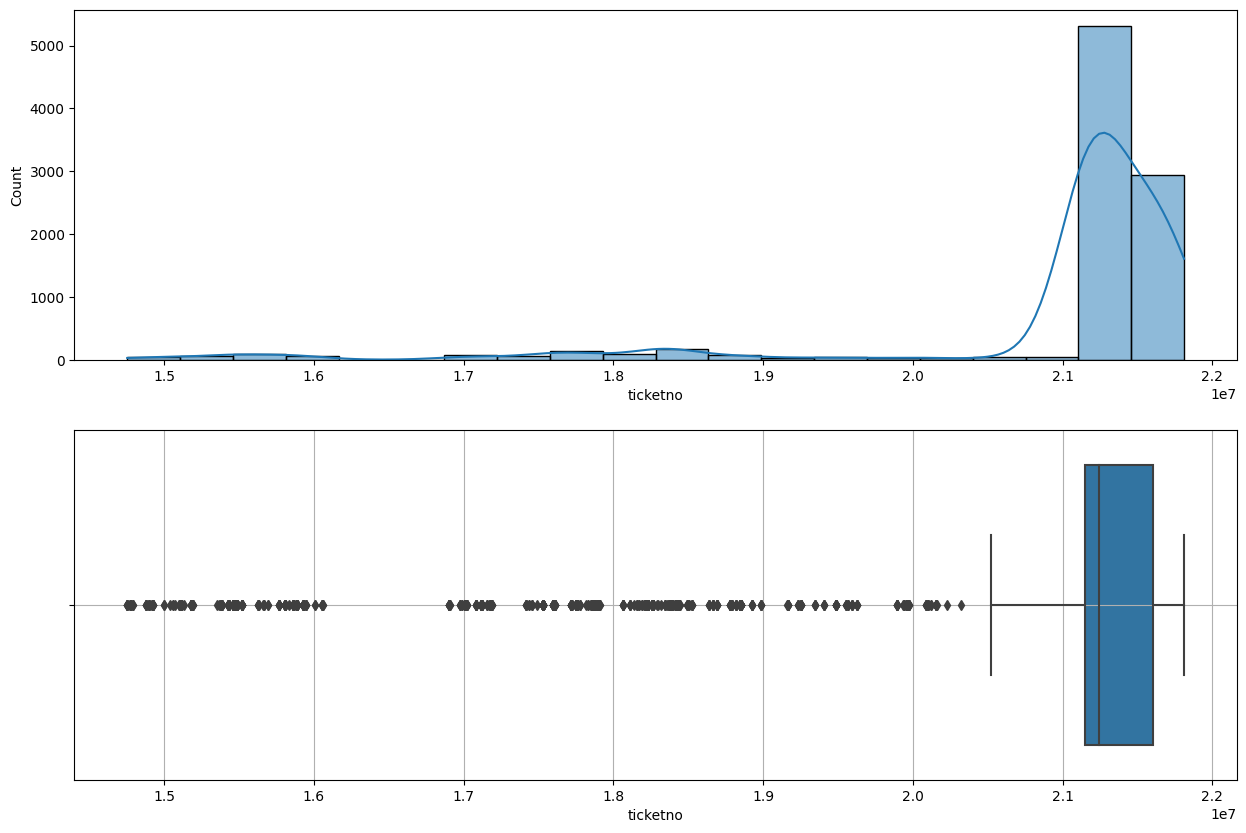

In [181]:
# ticketno 내의 데이터는 3개의 구간으로 분포가 형성되어 있으며,
# 21000000 이상의 값들이 대부분을 차지하고 있다.
eda1_n('ticketno', train)

,count,mean,std,min,25%,50%,75%,max
ticketno,37671.0,2.183348e+07,489205.738802,15238899.0,21850183.0,21909335.0,21958833.0,26067480.0


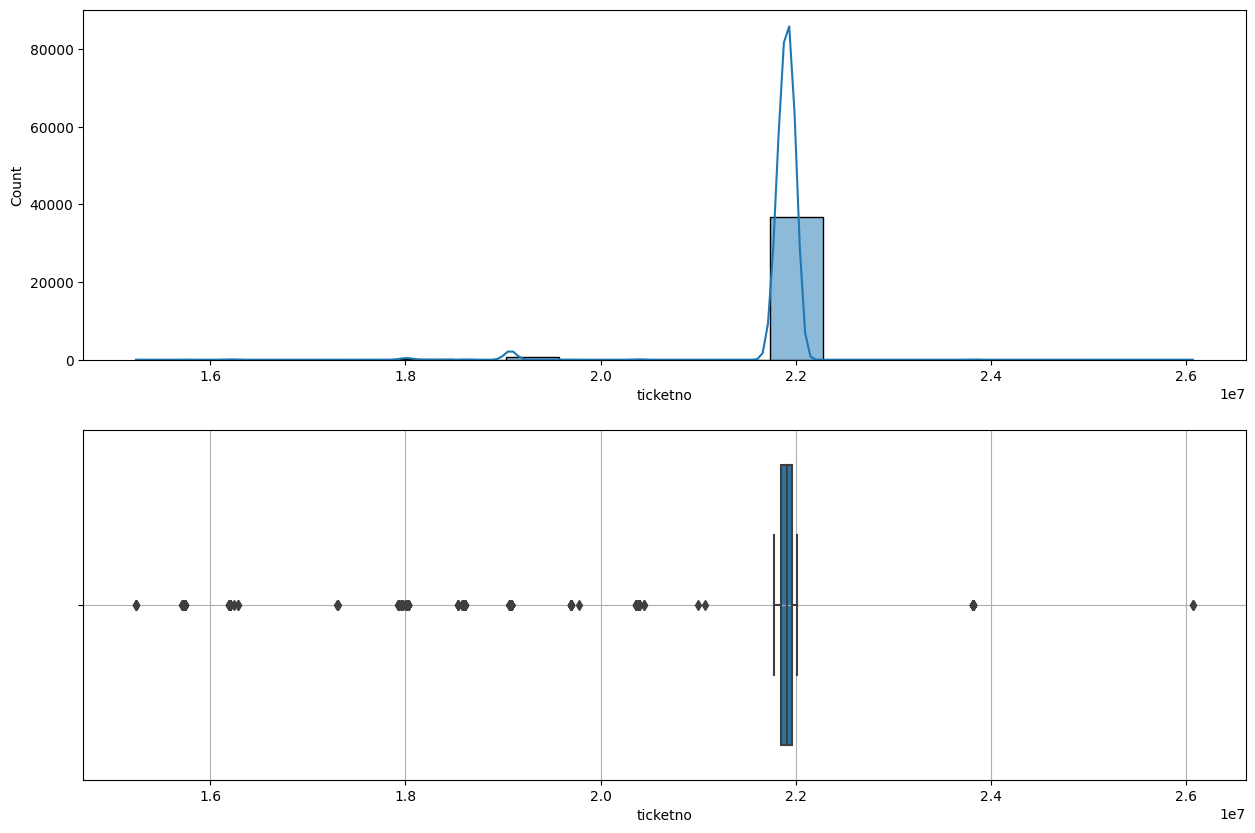

In [182]:
# test 데이터의 ticketno도 train의 그것과 비슷한 양상을 보인다.
eda1_n('ticketno', test)

,count,mean,std,min,25%,50%,75%,max
ticketno,12095.0,2.094831e+07,1.340398e+06,14753084.0,21147066.0,21305527.0,21671147.0,22013451.0


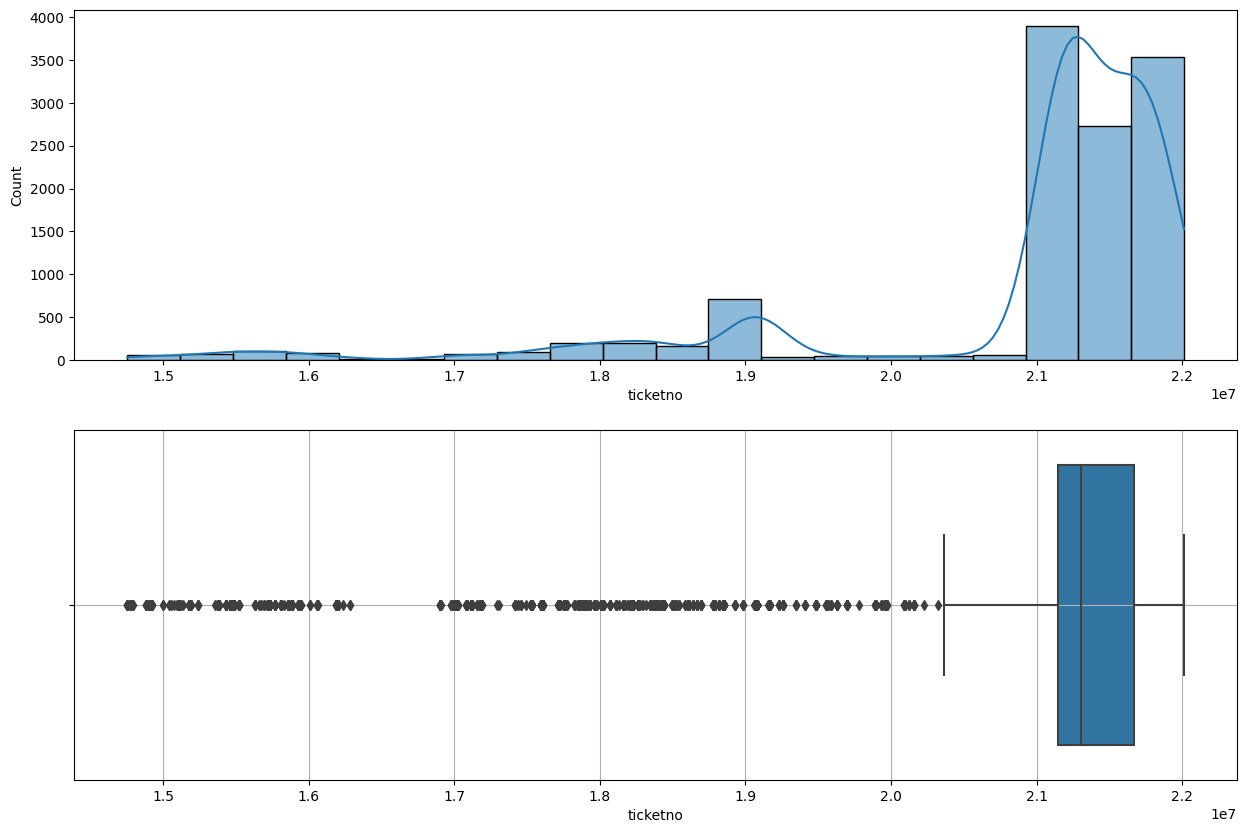

,count,mean,std,min,25%,50%,75%,max
ticketno,15493.0,2.191196e+07,55539.620483,21775522.0,21879201.0,21917398.0,21958833.0,22015278.0


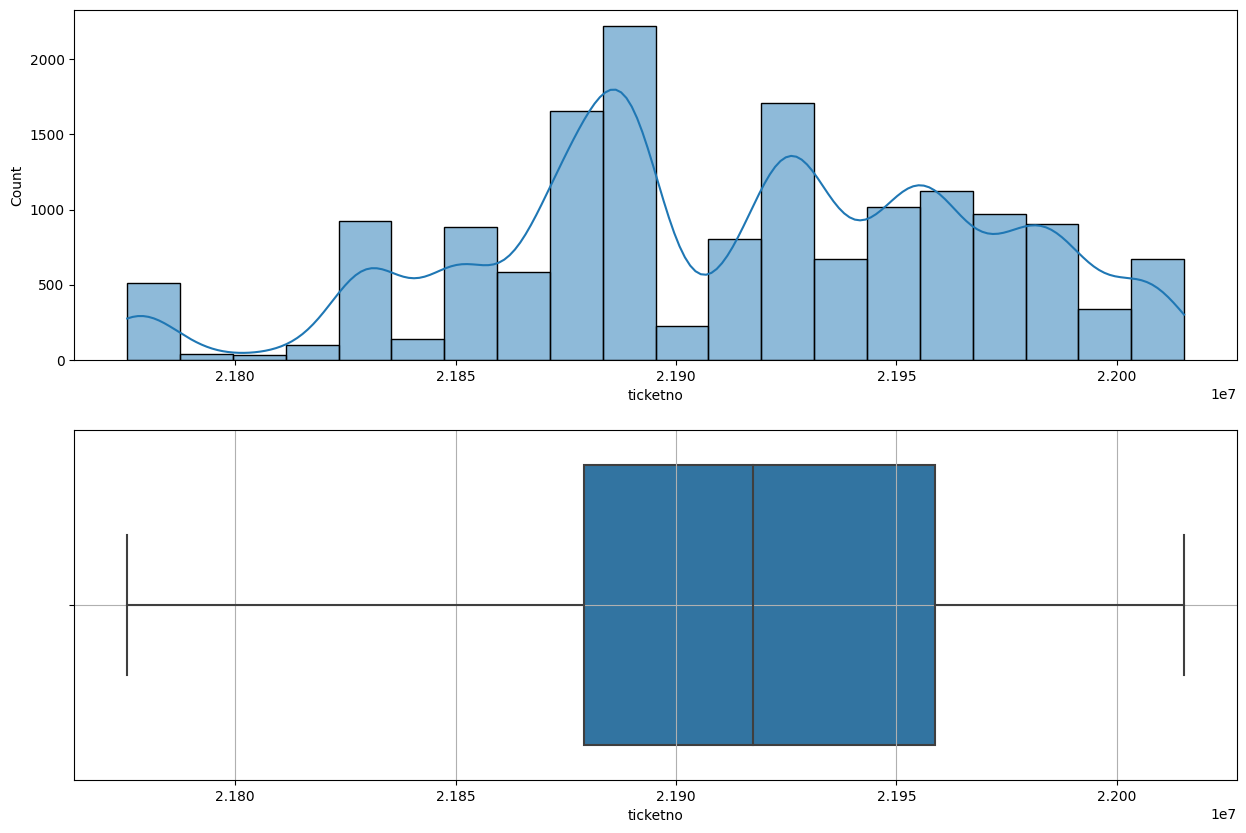

,count,mean,std,min,25%,50%,75%,max
ticketno,19405.0,2.190495e+07,98847.460599,21775315.0,21850007.0,21926209.0,21960659.0,26067480.0


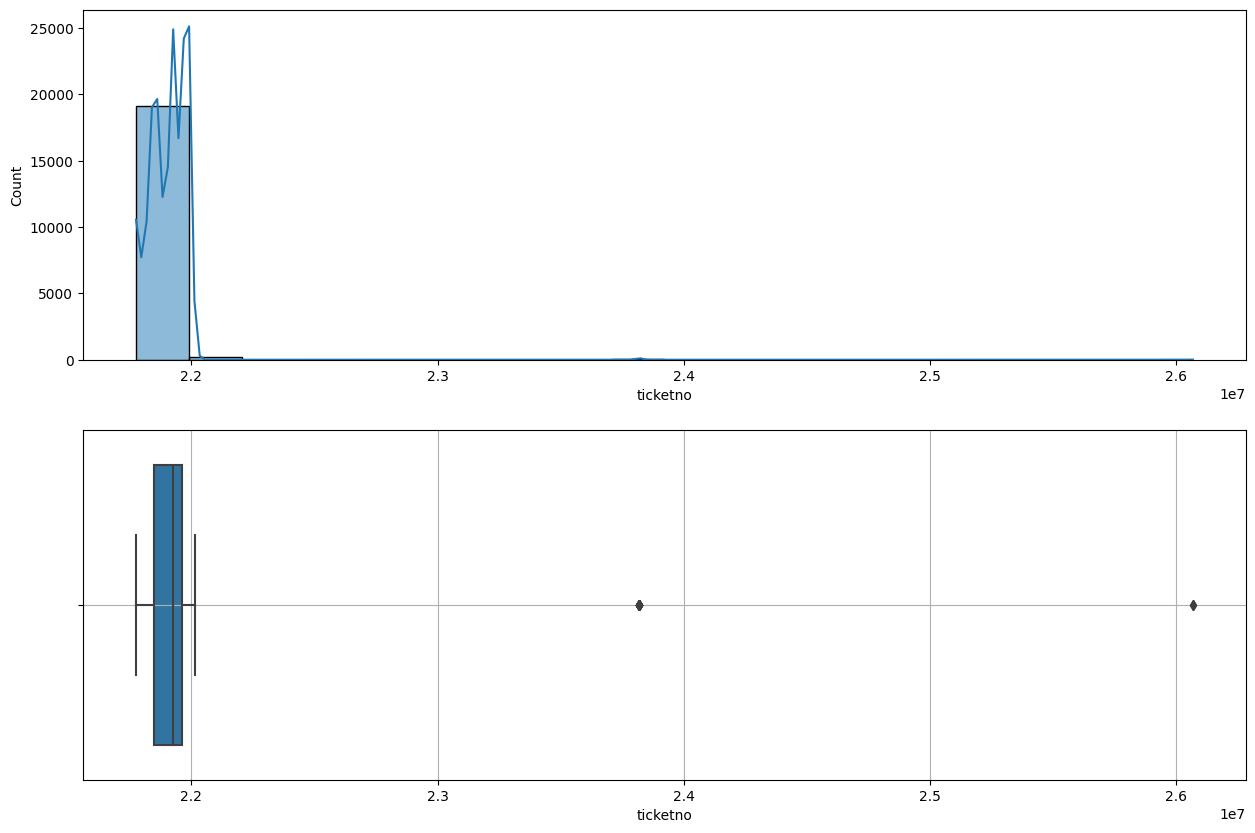

In [183]:
# 장치 A는 전체 데이터와 비슷한 분포, B는 21000000 ~ 22000000 값들 만을,
# 장치 C는 B와 비슷한 분포에 추가로 값이 큰 이상치를 가지고 있다.
for data in [a, b, c]:
    eda1_n('ticketno', data)

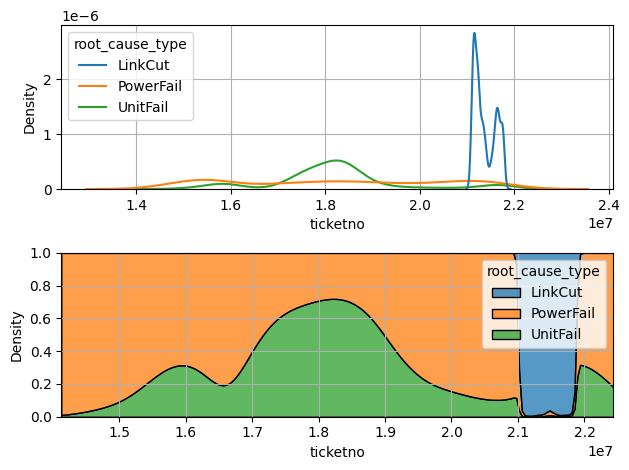

In [184]:
# ticketno의 대부분을 차지하고 있는 21000000 이상의 값들은 target 값이 거의 LinkCut이다.
# ticketno는 target에 대하여 높은 연관이 있는 것으로 추측된다.
num_cat('ticketno', target, train)

In [185]:
train['ticketno_log1p'] = np.log1p(train['ticketno'])

,count,mean,std,min,25%,50%,75%,max
ticketno_log1p,9322.0,16.856138,0.068592,16.506963,16.867012,16.871516,16.888406,16.897935


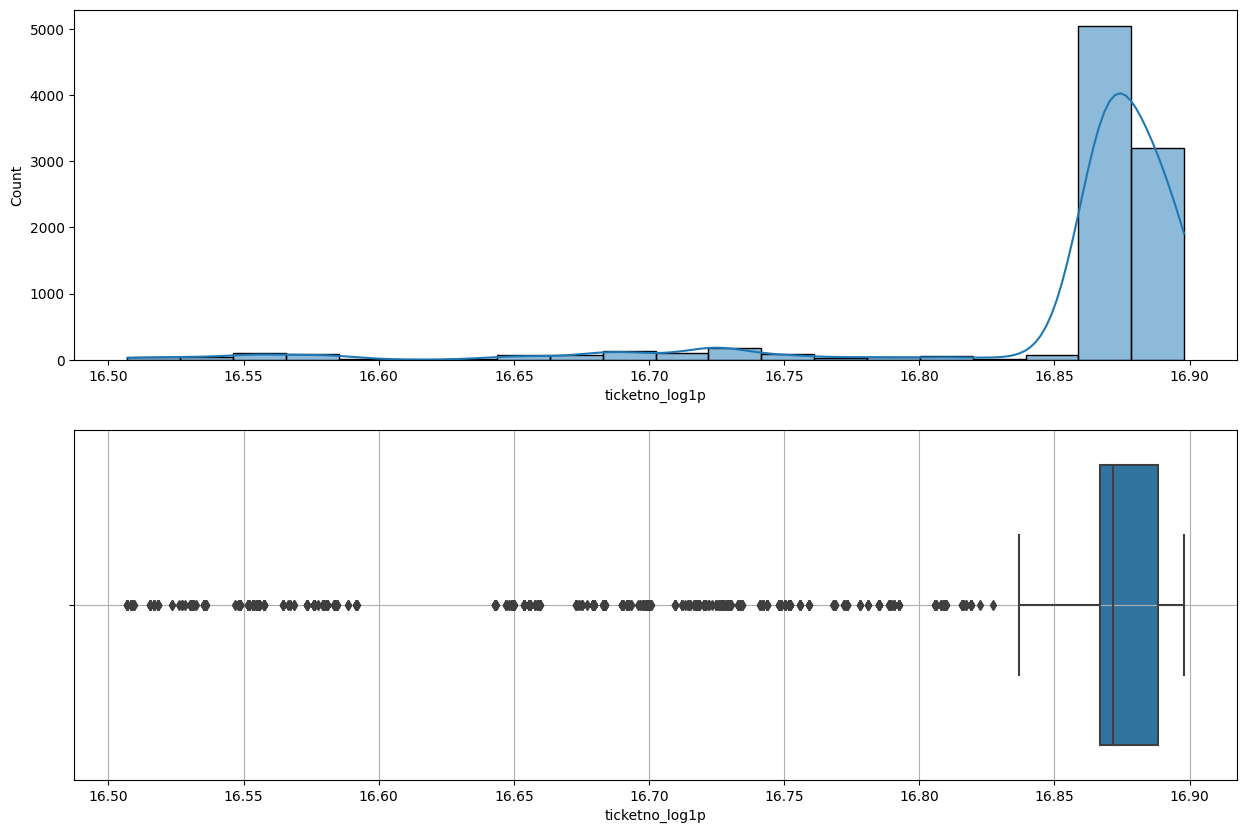

In [186]:
eda1_n('ticketno_log1p', train)

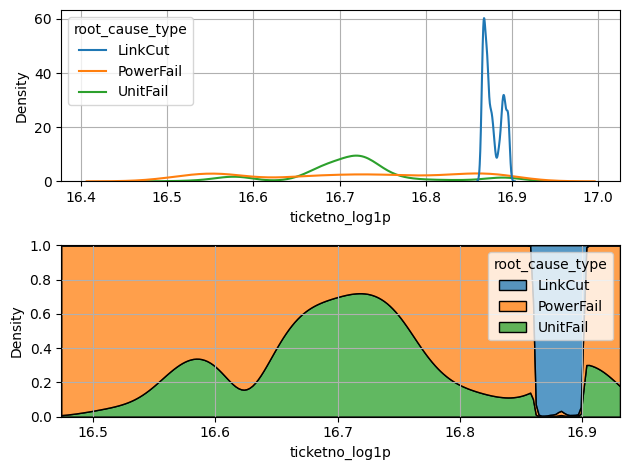

In [187]:
num_cat('ticketno_log1p', target, train)

## alarmno
- 경보의 ID를 나타냅니다. 본 문제에서 경보란, 장치의 상태나 오류 등을 나타내는 최소 단위를 의미합니다.

,count,mean,std,min,25%,50%,75%,max
alarmno,9322.0,1.511737e+12,4.899595e+11,868125045.0,1.669980e+12,1.670342e+12,1.671386e+12,1.671979e+12


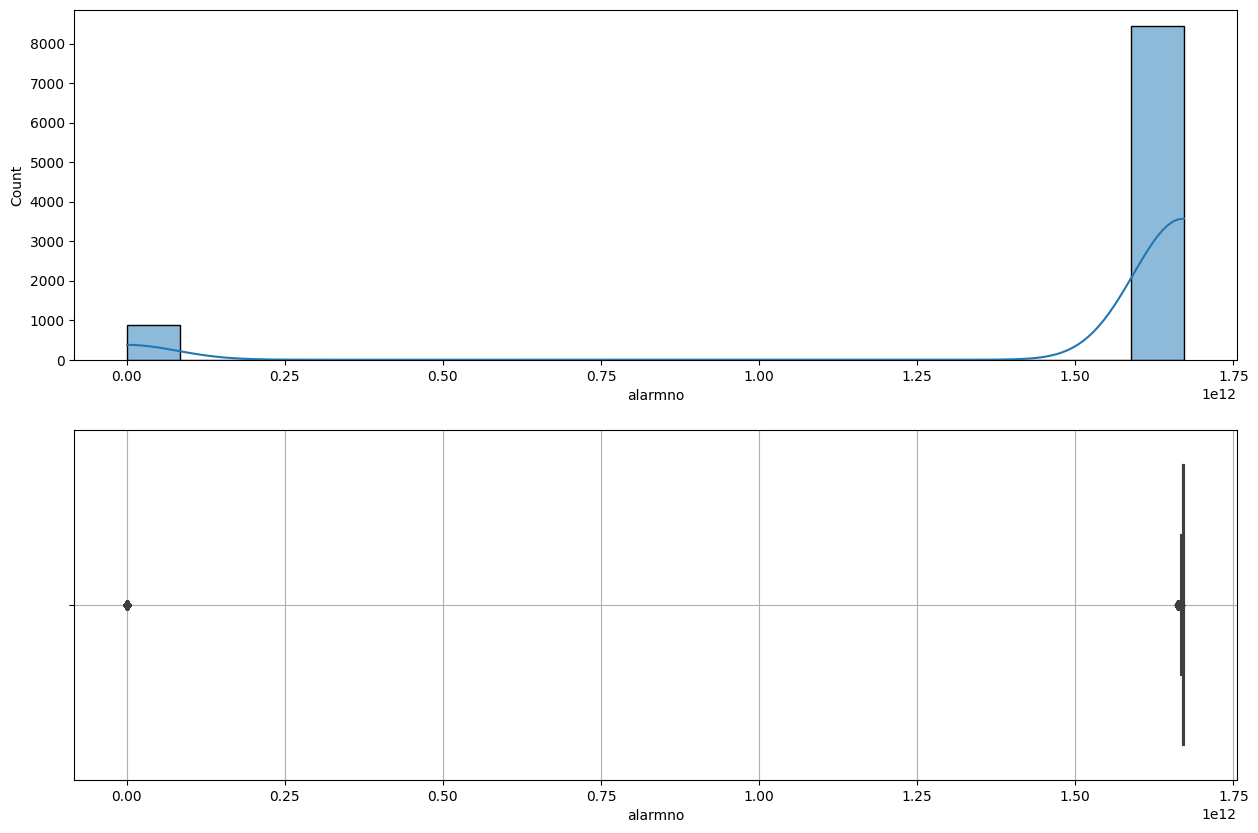

In [188]:
# train 데이터 내의 alarmno의 분포는 양극화 되어 있다.
eda1_n('alarmno', train)

,count,mean,std,min,25%,50%,75%,max
alarmno,37671.0,1.663914e+12,1.401507e+11,872739776.0,1.672044e+12,1.672163e+12,1.672305e+12,1.168594e+13


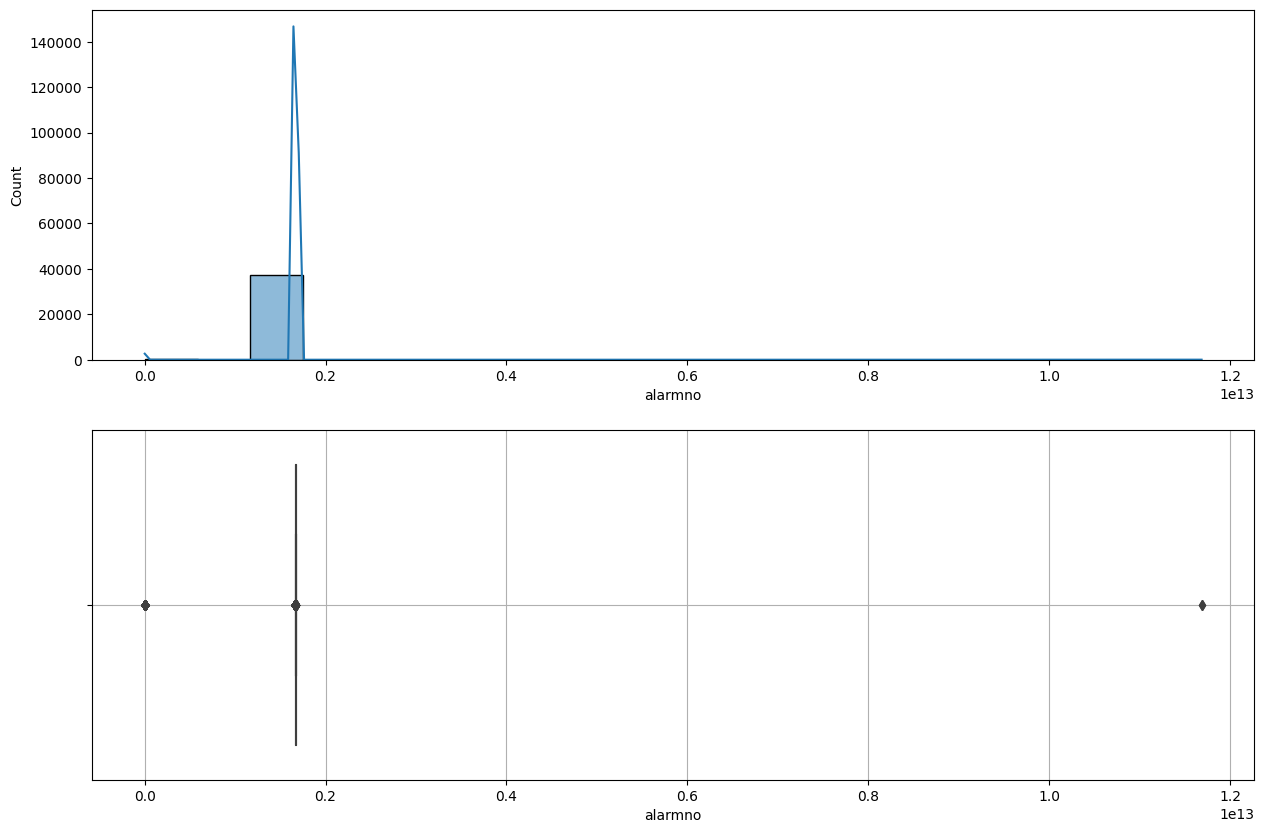

In [189]:
# test 데이터의 값들은 한쪽으로 몰려 있다.
eda1_n('alarmno', test)

,count,mean,std,min,25%,50%,75%,max
alarmno,12095.0,1.521119e+12,4.762867e+11,868125045.0,1.669957e+12,1.670553e+12,1.671563e+12,1.672412e+12


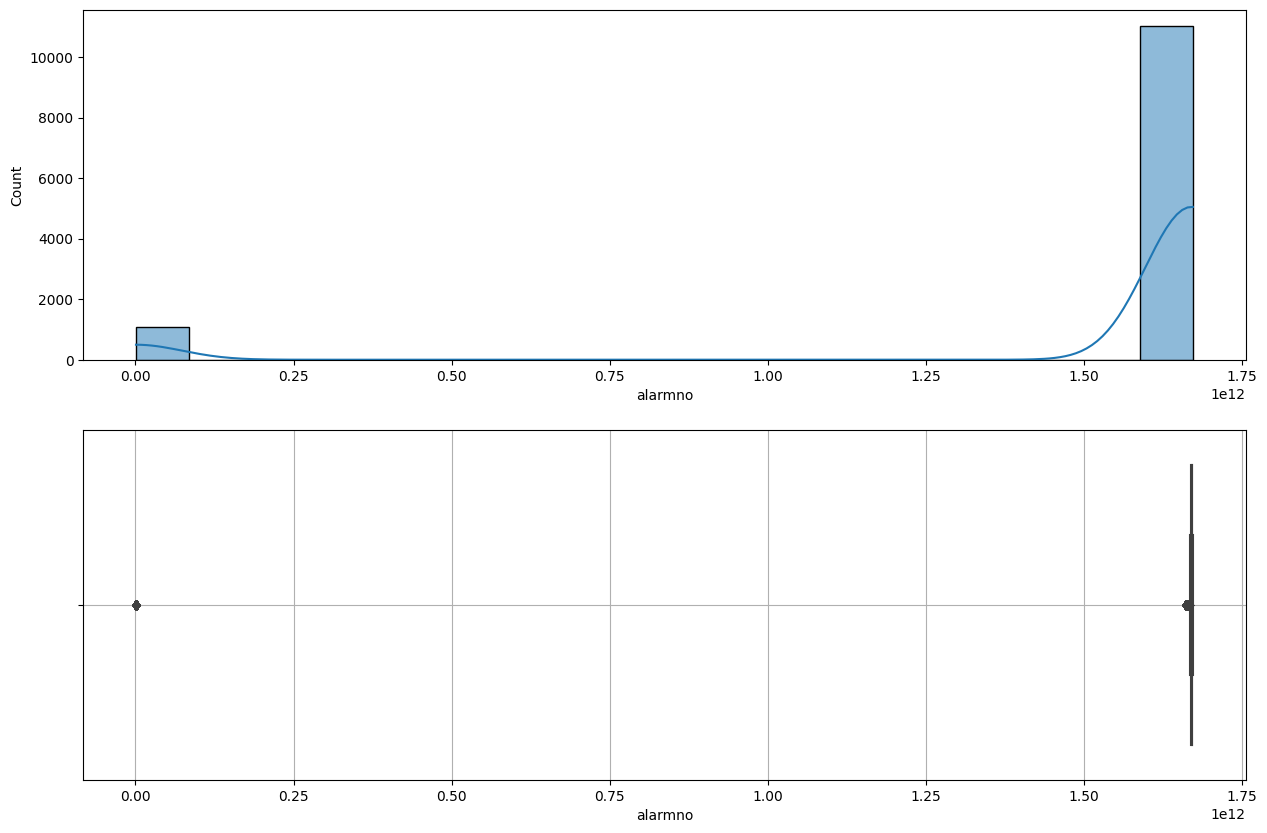

,count,mean,std,min,25%,50%,75%,max
alarmno,15493.0,1.672179e+12,1.325284e+08,1.671894e+12,1.672071e+12,1.672172e+12,1.672298e+12,1.672412e+12


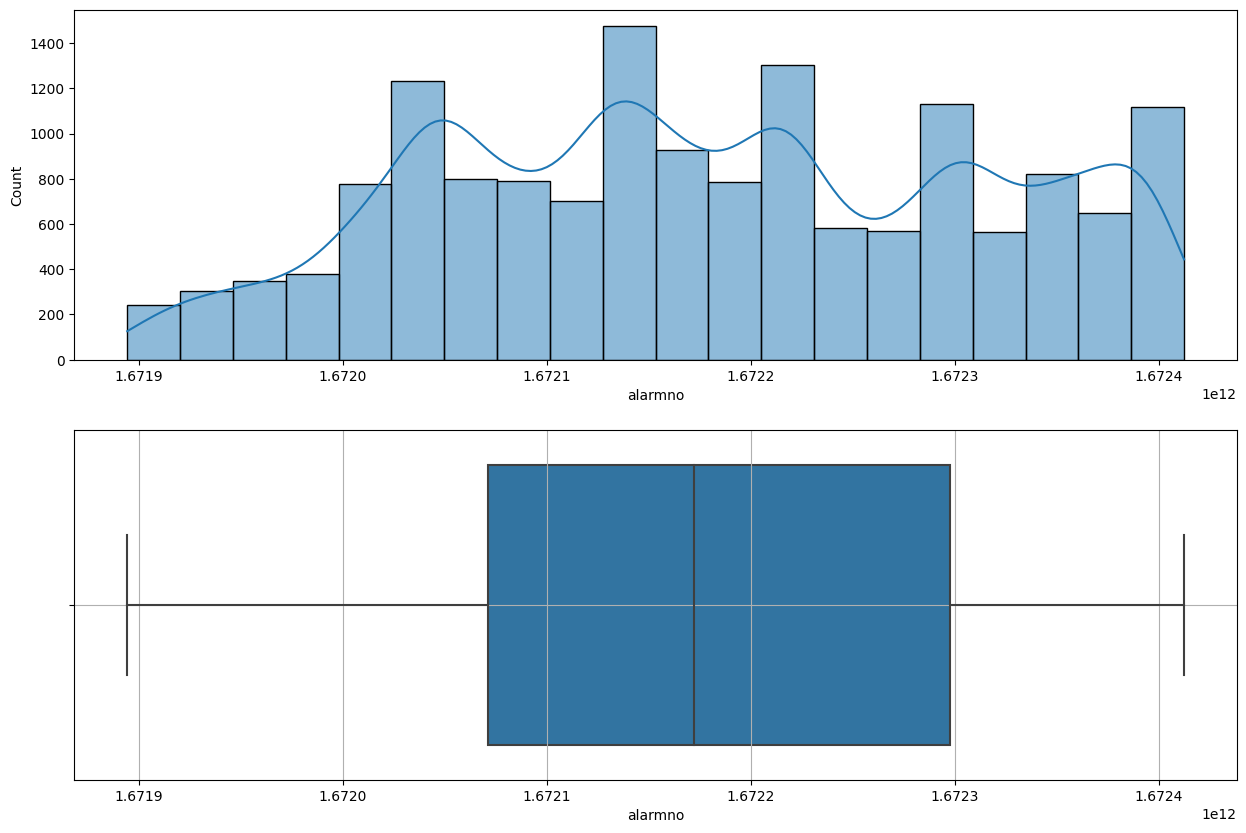

,count,mean,std,min,25%,50%,75%,max
alarmno,19405.0,1.673214e+12,1.016589e+11,1.671894e+12,1.672040e+12,1.672186e+12,1.672324e+12,1.168594e+13


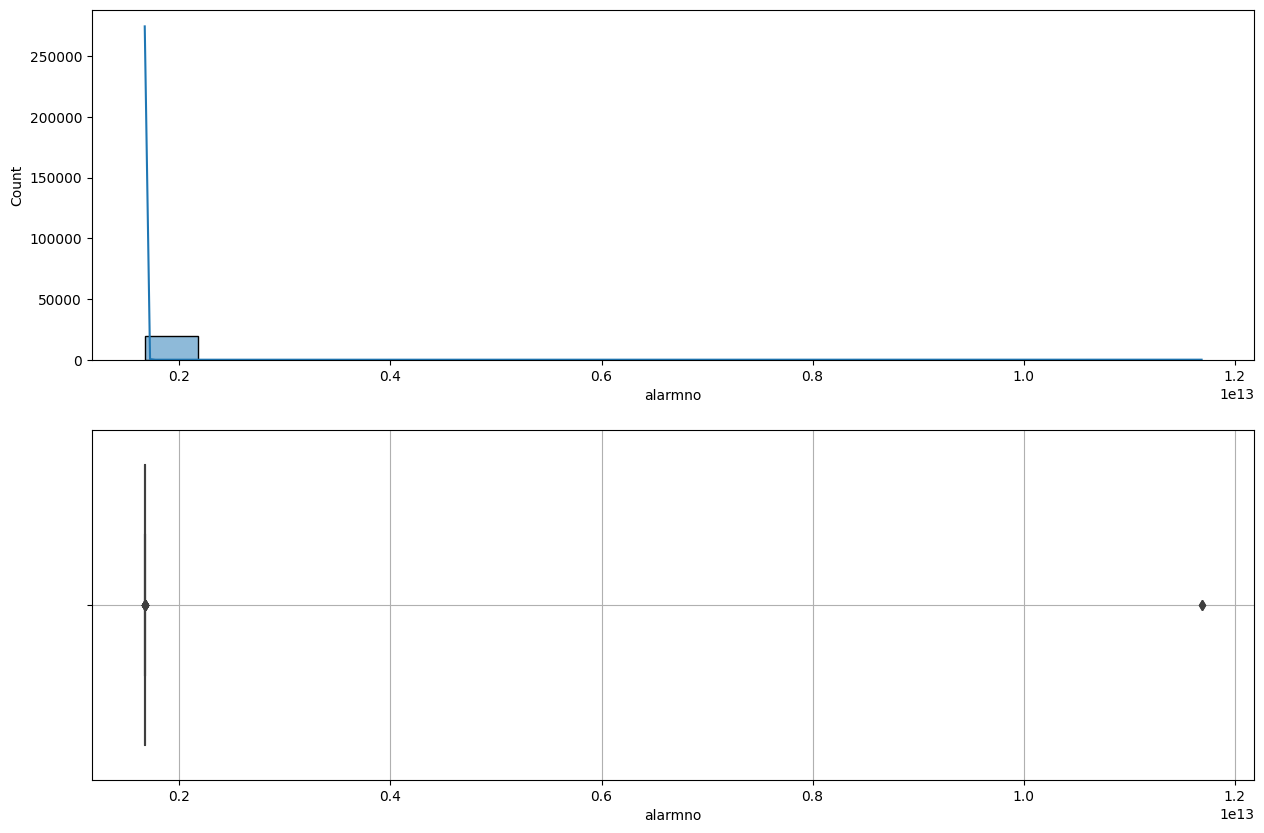

In [190]:
# alamno 변수의 장치별 분포 양상은 ticketno와 비슷하다.
for data in [a, b, c]:
    eda1_n('alarmno', data)

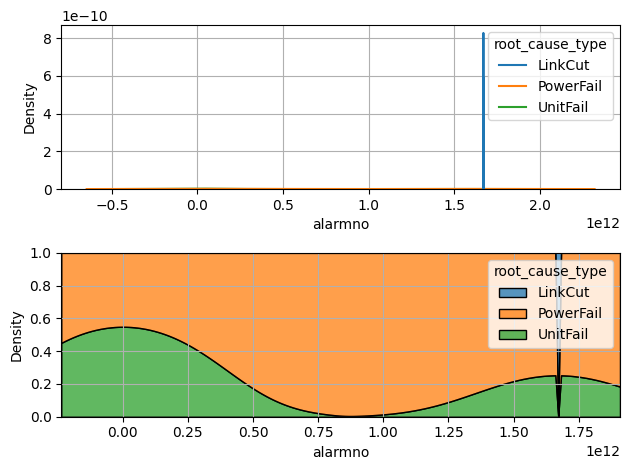

In [191]:
# alarmno의 우편향 값은 target이 LinkCut이며, 좌편향 값은 target이 LinkCut이 아닌 특징을 보인다.
# 적어도 장치 A에서 alarmno 변수는 타겟 변수와 강한 연관이 있는 것으로 추측된다.
num_cat('alarmno', target, train)

## alarmtime
- 경보가 발생한 시각을 나타냅니다.

In [192]:
tz_pytz = pytz.timezone('Asia/Seoul')
train['alarmtime'] = pd.to_datetime(train['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')
test['alarmtime'] = pd.to_datetime(test['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')
a['alarmtime'] = pd.to_datetime(a['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')
b['alarmtime'] = pd.to_datetime(b['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')
c['alarmtime'] = pd.to_datetime(c['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')

<ipython-input-192-c4f30e011ccf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['alarmtime'] = pd.to_datetime(b['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')
<ipython-input-192-c4f30e011ccf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['alarmtime'] = pd.to_datetime(c['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')


In [193]:
train['alarmday'] = train['alarmtime'].dt.day
test['alarmday'] = test['alarmtime'].dt.day
a['alarmday'] = a['alarmtime'].dt.day
b['alarmday'] = b['alarmtime'].dt.day
c['alarmday'] = c['alarmtime'].dt.day

<ipython-input-193-7f9eec9627ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['alarmday'] = b['alarmtime'].dt.day
<ipython-input-193-7f9eec9627ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['alarmday'] = c['alarmtime'].dt.day


In [194]:
train['alarmhour'] = train['alarmtime'].dt.hour
test['alarmhour'] = test['alarmtime'].dt.hour
a['alarmhour'] = a['alarmtime'].dt.hour
b['alarmhour'] = b['alarmtime'].dt.hour
c['alarmhour'] = c['alarmtime'].dt.hour

<ipython-input-194-9e31c065787f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['alarmhour'] = b['alarmtime'].dt.hour
<ipython-input-194-9e31c065787f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['alarmhour'] = c['alarmtime'].dt.hour


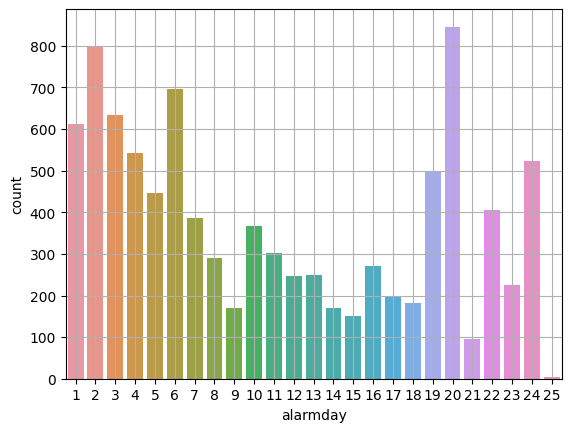

In [195]:
eda1_c('alarmday', train)

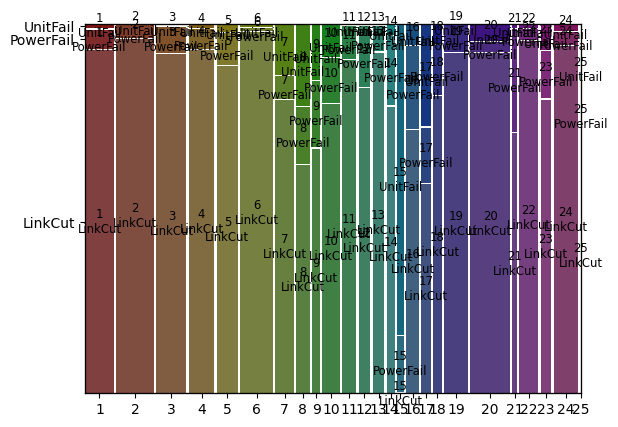

카이제곱통계량 3089.3910999922155
p-value 0.0
기대빈도
 [[5.32248659e+02 4.77406136e+01 3.30107273e+01]
 [6.93746621e+02 6.22263463e+01 4.30270328e+01]
 [5.50482300e+02 4.93760995e+01 3.41416005e+01]
 [4.71469856e+02 4.22889938e+01 2.92411500e+01]
 [3.88116070e+02 3.48124866e+01 2.40714439e+01]
 [6.05183222e+02 5.42825574e+01 3.75342201e+01]
 [3.35151684e+02 3.00617893e+01 2.07865265e+01]
 [2.51797897e+02 2.25852821e+01 1.56168204e+01]
 [1.48473933e+02 1.33175284e+01 9.20853894e+00]
 [3.17786312e+02 2.85041837e+01 1.97095044e+01]
 [2.63085389e+02 2.35977258e+01 1.63168848e+01]
 [2.15330616e+02 1.93143102e+01 1.33550740e+01]
 [2.17067153e+02 1.94700708e+01 1.34627762e+01]
 [1.46737395e+02 1.31617679e+01 9.10083673e+00]
 [1.31108560e+02 1.17599228e+01 8.13151684e+00]
 [2.36169062e+02 2.11834370e+01 1.46475005e+01]
 [1.73653722e+02 1.55760566e+01 1.07702210e+01]
 [1.58893156e+02 1.42520918e+01 9.85475220e+00]
 [4.33266037e+02 3.88622613e+01 2.68717014e+01]
 [7.34555246e+02 6.58867196e+01 4.55580348e

In [196]:
# 몇몇 날이 타겟의 분포에 영향을 미치는 것으로 보인다.
cat_cat('alarmday', target, train)

train



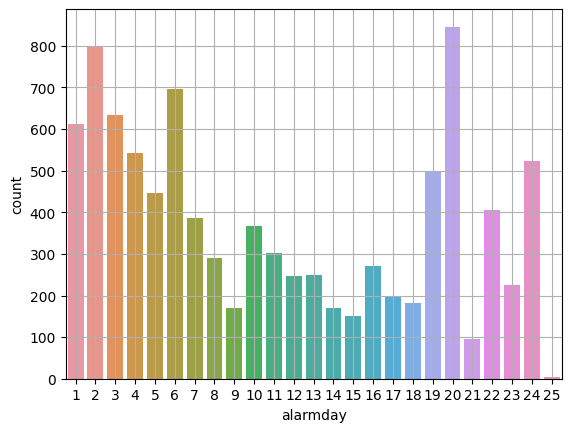

--------------------------------------------------
test



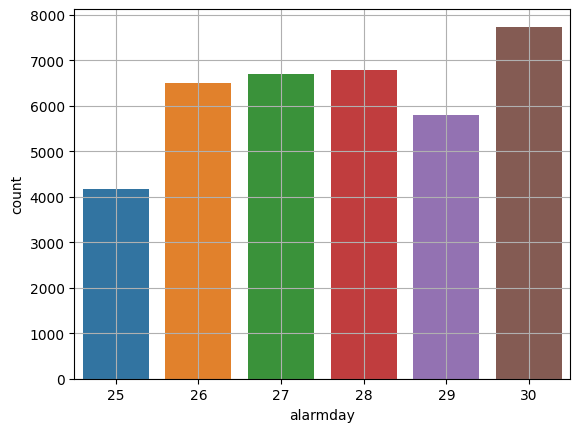

--------------------------------------------------
a



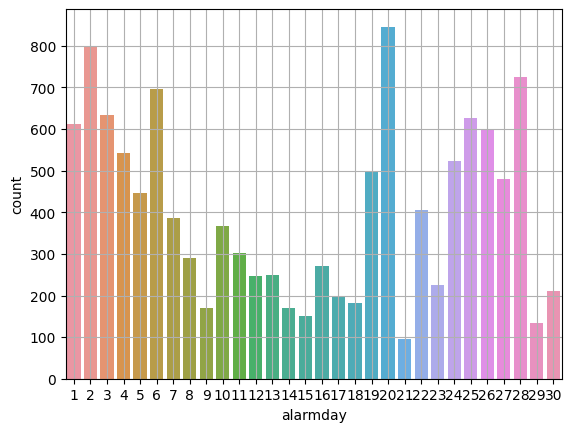

--------------------------------------------------
b



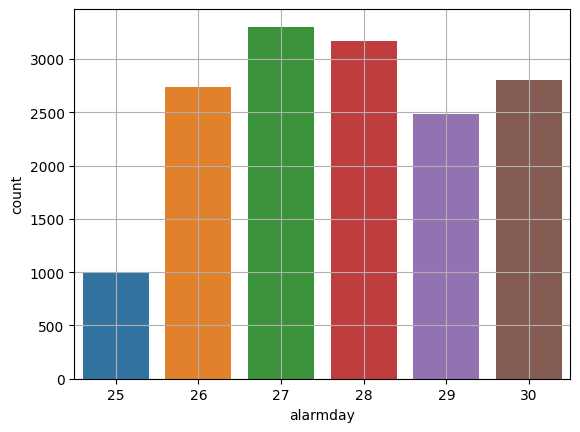

--------------------------------------------------
c



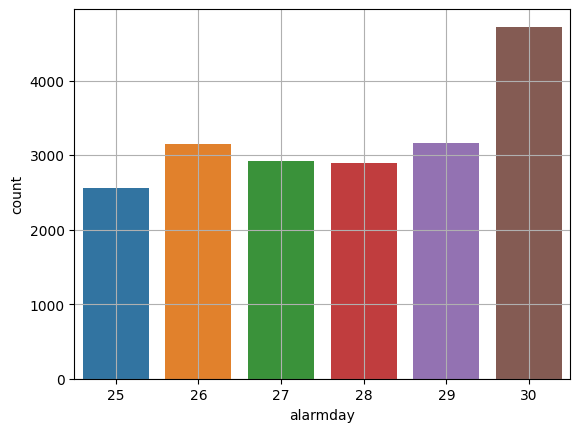

--------------------------------------------------


In [197]:
# 테스트 데이터에는 25~30 까지의 한정된 데이터만 존재한다.
for name, data in zip(['train', 'test', 'a', 'b', 'c'],[train, test, a, b, c]):
    print(f'{name}\n')
    eda1_c('alarmday', data)
    print('-' * 50)

train



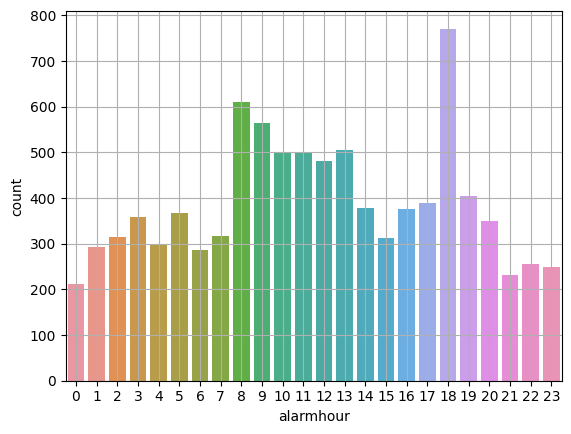

--------------------------------------------------
test



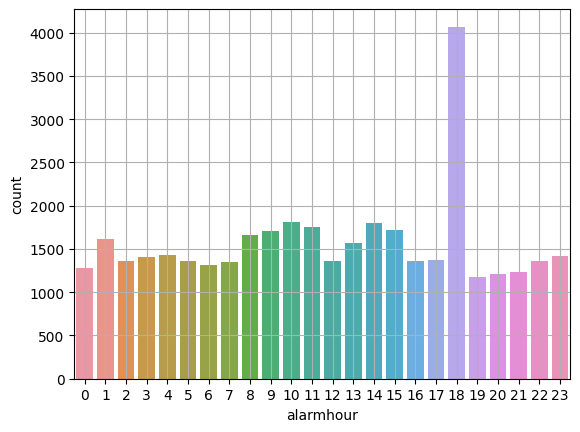

--------------------------------------------------
a



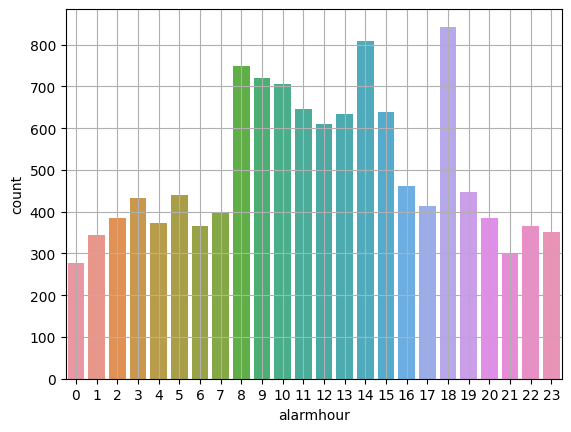

--------------------------------------------------
b



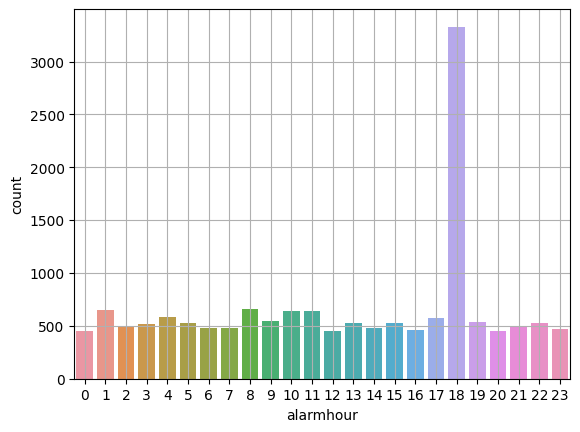

--------------------------------------------------
c



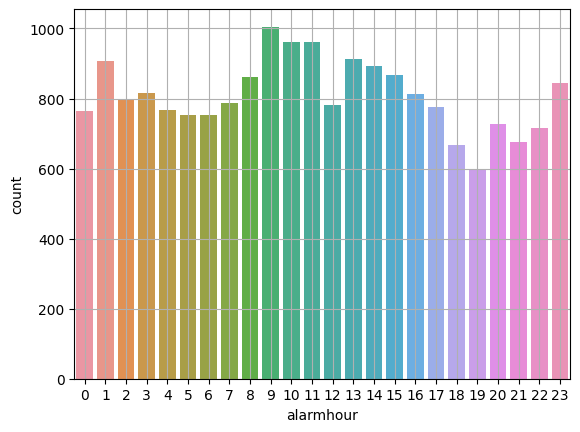

--------------------------------------------------


In [198]:
for name, data in zip(['train', 'test', 'a', 'b', 'c'],[train, test, a, b, c]):
    print(f'{name}\n')
    eda1_c('alarmhour', data)
    print('-' * 50)

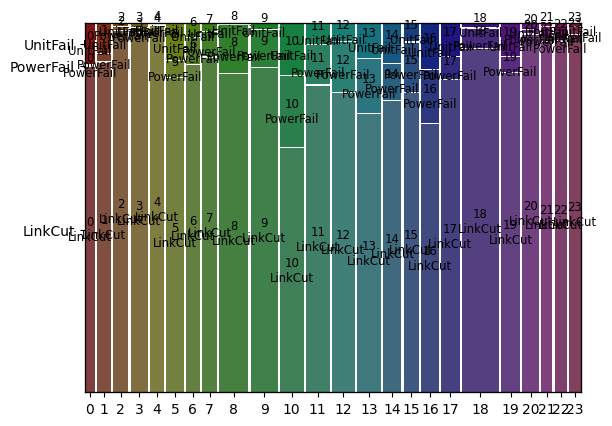

카이제곱통계량 792.7625724203185
p-value 9.688319301254205e-137
기대빈도
 [[183.20467711  16.43273976  11.36258314]
 [254.40270328  22.81892298  15.77837374]
 [272.63634413  24.45440893  16.90924694]
 [311.70843167  27.95902167  19.33254666]
 [257.87577773  23.13044411  15.99377816]
 [319.52284917  28.65994422  19.81720661]
 [248.324823    22.273761    15.40141601]
 [275.24114997  24.68804977  17.07080026]
 [529.64385325  47.50697275  32.849174  ]
 [489.7034971   43.92447973  30.37202317]
 [434.13430594  38.9401416   26.92555246]
 [432.39776872  38.78438103  26.81785025]
 [418.50547093  37.5382965   25.95623257]
 [439.34391761  39.4074233   27.24865909]
 [328.20553529  29.43874705  20.35571766]
 [271.76807552  24.37652864  16.85539584]
 [326.46899807  29.28298648  20.24801545]
 [337.75649002  30.29543017  20.94807981]
 [669.43509976  60.04569835  41.51920189]
 [351.64878781  31.5415147   21.80969749]
 [303.02574555  27.18021884  18.79403561]
 [200.57004935  17.99034542  12.43960523]
 [221.4084960

In [199]:
# 몇몇 시간대에서 유의미한 타겟 분포의 변화가 있는 것으로 보인다.
cat_cat('alarmhour', target, train)

## alarmlevel
- 경보의 등급 분류를 나타냅니다.

train



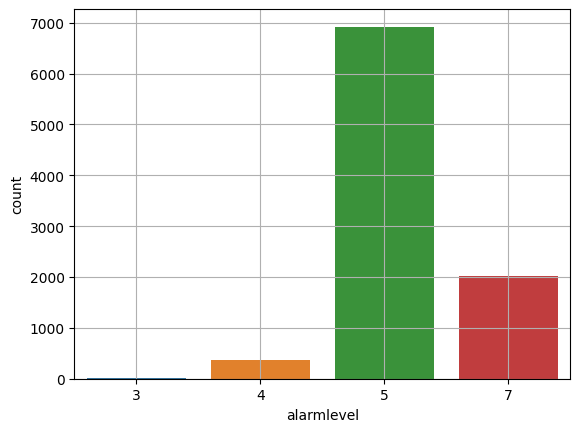

--------------------------------------------------
test



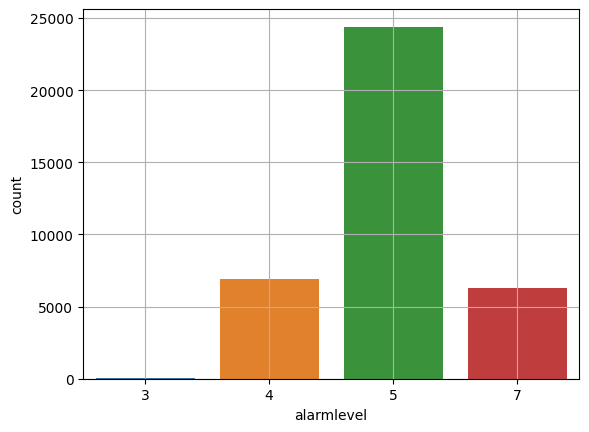

--------------------------------------------------
a



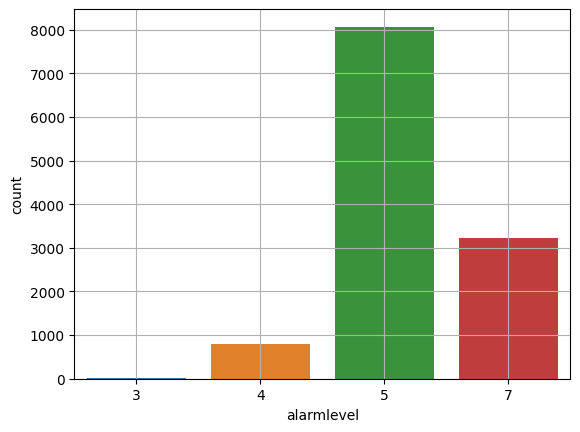

--------------------------------------------------
b



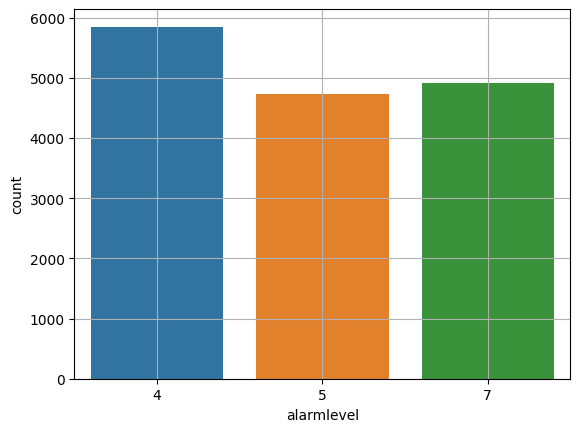

--------------------------------------------------
c



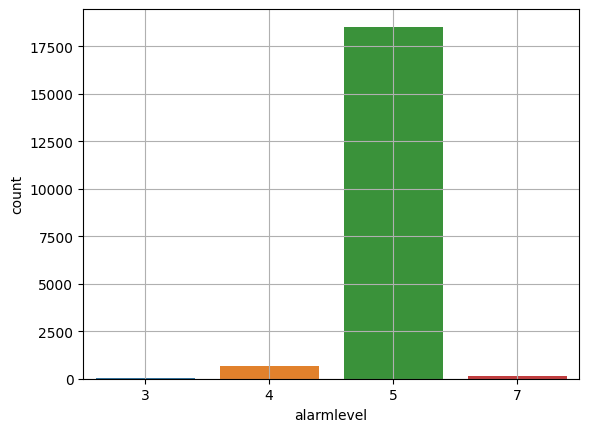

--------------------------------------------------


In [200]:
# 모든 데이터가 동일한 범주 유형을 공유하지만,
# 제조사 별로 다른 범주 분포를 가진다.
for name, data in zip(['train', 'test', 'a', 'b', 'c'],[train, test, a, b, c]):
    print(f'{name}\n')
    eda1_c('alarmlevel', data)
    print('-' * 50)

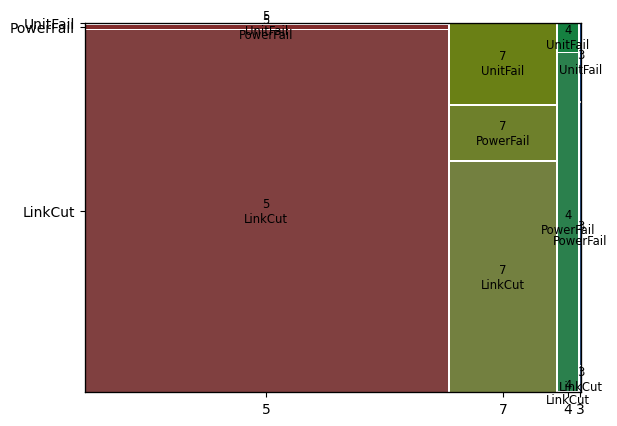

카이제곱통계량 6010.961461632671
p-value 0.0
기대빈도
 [[1.21557606e+01 1.09032396e+00 7.53915469e-01]
 [3.25600729e+02 2.92051062e+01 2.01941643e+01]
 [6.01015533e+03 5.39087320e+02 3.72757348e+02]
 [1.74608818e+03 1.56617250e+02 1.08294572e+02]]


In [201]:
# level3 데이터의 경우 빈도수가 적어서 판단이 불가능하다.
# 하지만 level 별로 타켓 분포에 영향을 준다는 것은 확인이 가능하다.
cat_cat('alarmlevel', target, train)

## alarmmsg_original
- 경보 메시지를 나타냅니다. 경보 메시지는 다양한 용어의 조합으로 구성되어 있으며, 사용하는 용어는 장치 제조사마다 다릅니다.

In [202]:
train['alarmmsg_original'].value_counts().index.to_list()

['OPT-PWR-LOW',
 'LSP-LOC',
 'OPT-LOS',
 'ETH-ERR',
 'OPT-REMOVE',
 'PSU-FAIL',
 'ETH-LINK-FAIL',
 'PW-LOC',
 'DCC-FAIL',
 'ETH-NO-TX-TRAFFIC',
 'TDM-PW-LOF',
 'BOOTING',
 'TRK-CONN-MIS',
 'AUTONEGO_MISMATCH',
 'ETH-NO-RX-TRAFFIC',
 'ProtectionSwitched',
 'BATT-LOW',
 'NVRAM-FAIL',
 'LINK_FAIL_MANUAL',
 'UNIT-REM',
 'OS_MISMATCH',
 'FAN-FAIL',
 'QL_FAIL',
 'Restarted',
 'FAN-48V-FAIL',
 '48V-FAIL',
 'TDM-PW-RMT_FAIL',
 'PortShutdown',
 'UNIT-IPC-FAIL',
 'PSU-REM',
 'OPT-MIS']

In [203]:
# test 데이터에서 train 데이터에서 전혀 존재하지 않던 값이 등장한다.
test['alarmmsg_original'].value_counts().index.to_list()

['Loss Of Signal',
 'DDM_RX_PWR_HIGH',
 'ETHER_LINK_DOWN (LOCAL_FAULT)',
 'MEP_LSP_RDI',
 'MEP_LSP_LOC',
 'BATT_ENV_FAIL',
 'DDM_RX_PWR_LOW',
 'ETHER_LINK_DOWN (LOS)',
 'OPT-LOS',
 'Input Power Degrade Defect',
 'ETH-ERR',
 'MEP_PWE_LOC',
 'PSU-FAIL',
 'PPP Fail',
 'LSP-LOC',
 'ETH-NO-TX-TRAFFIC',
 'Server Signal Failure',
 'ETH-LINK-FAIL',
 'Client Signal Fail',
 'UNIT_FAIL',
 'ETHER_LINK_DOWN (LLCF)',
 'DCN_FAIL',
 'OPT-REMOVE',
 'MEP_PWE_CSF',
 'MODULE_OUT ( SFP )',
 'Improper Removal',
 'ETHER_TCA_DROP_15M',
 'Loss of Connectivity',
 'House Keeping Alarm',
 'Rx Fail',
 'Remote Defect Indication',
 'Procedure Error',
 'Manual (Management) Removal',
 'ETHER_TCA_CRC_15M',
 'Underlying Resource Unavailable',
 'STM1_LOS',
 'ETHER_TCA_DROP_1D',
 'MODULE_OUT ( SFP+ )',
 'OAM Loss Of Continuity',
 'ETHER_TCA_CRC_1D',
 'NE Not Reachable Via Primary Mng Interf',
 'OPT-PWR-LOW',
 'Remote Fault Indication',
 'DCC-FAIL',
 'NE Not Reach Via Primary Mng Interf',
 'Node Isolation',
 'DC_INPUT_A_FA

In [204]:
# 장치의 제조사 별로 다른 메시지 표기를 사용하기 때문으로 예상된다.
a['alarmmsg_original'].value_counts().index.to_list()

['OPT-PWR-LOW',
 'LSP-LOC',
 'OPT-LOS',
 'ETH-ERR',
 'PSU-FAIL',
 'ETH-LINK-FAIL',
 'OPT-REMOVE',
 'ETH-NO-TX-TRAFFIC',
 'PW-LOC',
 'DCC-FAIL',
 'TRK-CONN-MIS',
 'BOOTING',
 'TDM-PW-LOF',
 'AUTONEGO_MISMATCH',
 'ETH-NO-RX-TRAFFIC',
 'OPT-PWR-HIGH',
 'ProtectionSwitched',
 'BATT-LOW',
 'LINK_FAIL_MANUAL',
 'NVRAM-FAIL',
 '48V-FAIL',
 'UNIT-REM',
 'QL_FAIL',
 'TDM-PW-RMT_FAIL',
 'OS_MISMATCH',
 'FAN-FAIL',
 'Restarted',
 'OPT-MIS',
 'FAN-48V-FAIL',
 'PortShutdown',
 'UNIT-IPC-FAIL',
 'PSU-REM']

In [205]:
b['alarmmsg_original'].value_counts().index.to_list()

['DDM_RX_PWR_HIGH',
 'ETHER_LINK_DOWN (LOCAL_FAULT)',
 'MEP_LSP_RDI',
 'MEP_LSP_LOC',
 'BATT_ENV_FAIL',
 'DDM_RX_PWR_LOW',
 'ETHER_LINK_DOWN (LOS)',
 'MEP_PWE_LOC',
 'UNIT_FAIL',
 'ETHER_LINK_DOWN (LLCF)',
 'DCN_FAIL',
 'MEP_PWE_CSF',
 'MODULE_OUT ( SFP )',
 'ETHER_TCA_DROP_15M',
 'ETHER_TCA_CRC_15M',
 'ETHER_TCA_DROP_1D',
 'STM1_LOS',
 'MODULE_OUT ( SFP+ )',
 'ETHER_TCA_CRC_1D',
 'DC_INPUT_A_FAIL',
 'BATTERY_FAIL',
 'ETHER_LINK_DOWN (REMOTE_FAULT)',
 'ETHER_PORT_CRC',
 'UNIT_INIT (BY RESET)',
 'UNIT_INIT (BY INSLOT)',
 'UNIT_OUT',
 'SYS_TEMP_LOW',
 'CEP_AIS']

In [206]:
c['alarmmsg_original'].value_counts().index.to_list()

['Loss Of Signal',
 'Input Power Degrade Defect',
 'PPP Fail',
 'Server Signal Failure',
 'Client Signal Fail',
 'Improper Removal',
 'Loss of Connectivity',
 'House Keeping Alarm',
 'Rx Fail',
 'Remote Defect Indication',
 'Procedure Error',
 'Manual (Management) Removal',
 'Underlying Resource Unavailable',
 'OAM Loss Of Continuity',
 'NE Not Reachable Via Primary Mng Interf',
 'Remote Fault Indication',
 'Node Isolation',
 'NE Not Reach Via Primary Mng Interf',
 'OAM RDI',
 'Unexpected MEG',
 'Abnormal Condition: Laser Forced',
 'IOC Payload-Links with Matrix Failure',
 'Hardware failure',
 'OAMLoss Of Continuity',
 'Synchronization Signal Fail Raise']

## site, sysname

- 경보가 발생한 지역을 나타냅니다. 본 문제에서는 알파벳 대문자 4자리로 익명화되어 있습니다.

- 경보가 발생한 장치명을 나타냅니다. 본 문제에서는 알파벳 소문자 4자리로 익명화되어 있습니다.

In [207]:
# 4개의 알파벳으로 이루어진 site와 sysname을 분리
site_col_dict = {}
for i in range(4):
    site_col_dict[f'site{i}'] = []


for idx, value in train['site'].items():
    for num, each_char in enumerate(value):
        site_col_dict[f'site{num}'].append(each_char)
site_df = pd.DataFrame(site_col_dict)
site_df

,site0,site1,site2,site3
0,A,C,E,N
1,A,C,E,N
2,A,C,E,N
3,A,C,E,N
4,A,C,E,N
...,...,...,...,...
9317,A,F,A,A
9318,A,G,F,D
9319,A,D,K,A
9320,A,B,Z,O


In [208]:
sysname_col_dict = {}
for i in range(4):
    sysname_col_dict[f'sysname{i}'] = []


for idx, value in train['sysname'].items():
    for num, each_char in enumerate(value):
        sysname_col_dict[f'sysname{num}'].append(each_char)

sysname_df = pd.DataFrame(sysname_col_dict)
sysname_df

,sysname0,sysname1,sysname2,sysname3
0,a,c,n,t
1,a,c,n,t
2,a,c,n,t
3,a,c,n,t
4,a,c,n,t
...,...,...,...,...
9317,a,g,o,w
9318,a,i,b,b
9319,a,e,a,q
9320,a,c,i,e


In [209]:
train = pd.concat([train, site_df, sysname_df], axis=1)
train

,ticketno,alarmno,alarmtime,alarmlevel,alarmmsg_original,site,sysname,unit,slot,port,...,alarmday,alarmhour,site0,site1,site2,site3,sysname0,sysname1,sysname2,sysname3
0,21122633,1669820428245,2022-12-01 00:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,...,1,0,A,C,E,N,a,c,n,t
1,21122633,1669821318728,2022-12-01 00:17:15+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,...,1,0,A,C,E,N,a,c,n,t
2,21122633,1669822214832,2022-12-01 00:32:11+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,...,1,0,A,C,E,N,a,c,n,t
3,21122633,1669823114128,2022-12-01 00:47:10+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,...,1,0,A,C,E,N,a,c,n,t
4,21122633,1669824028082,2022-12-01 01:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3.0,1.0,...,1,1,A,C,E,N,a,c,n,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,21774618,1671892499215,2022-12-24 23:37:14+09:00,7,OPT-LOS,AFAA,agow,EQPT,5.0,5.0,...,24,23,A,F,A,A,a,g,o,w
9318,15693425,877949375,2022-12-25 10:13:46+09:00,7,OPT-REMOVE,AGFD,aibb,EQPT,1.0,8.0,...,25,10,A,G,F,D,a,i,b,b
9319,21809789,1671974758375,2022-12-25 22:28:14+09:00,7,OPT-LOS,ADKA,aeaq,EQPT,3.0,3.0,...,25,22,A,D,K,A,a,e,a,q
9320,21811213,1671978167736,2022-12-25 23:25:03+09:00,7,OPT-LOS,ABZO,acie,EQPT,5.0,6.0,...,25,23,A,B,Z,O,a,c,i,e


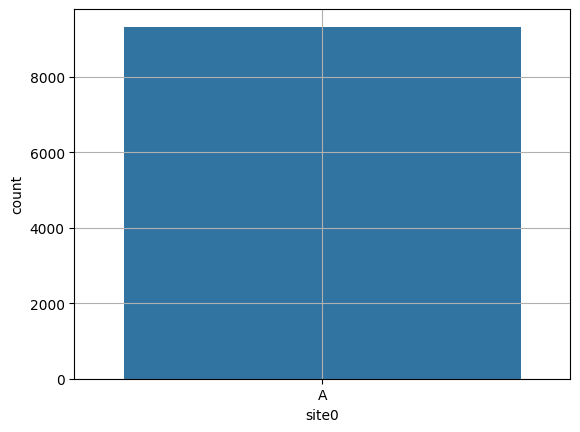

--------------------------------------------------


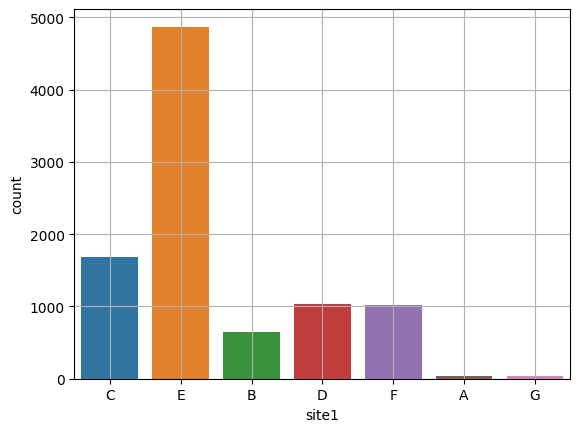

--------------------------------------------------


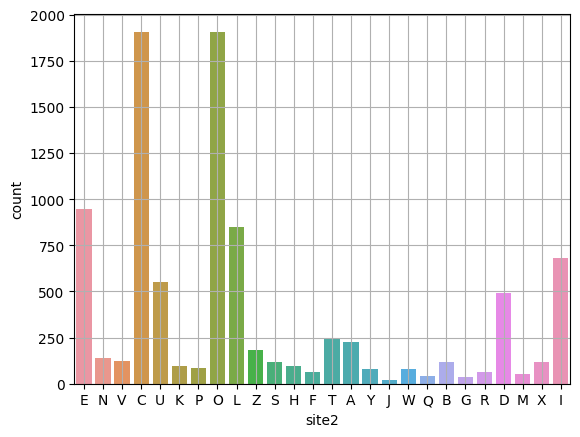

--------------------------------------------------


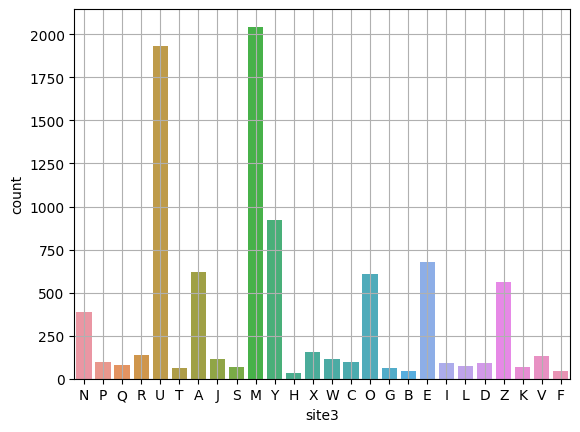

--------------------------------------------------


In [210]:
# 첫번째 글자는 A로 통일 되어 있다.
# 두번째 글자는 A B C D E F G 까지 존재한다.
# 세번째와 네번째 글자는 26가지의 알파벳이 모두 존재한다.
for i in range(4):
    eda1_c(f'site{i}', train)
    print('-' * 50)

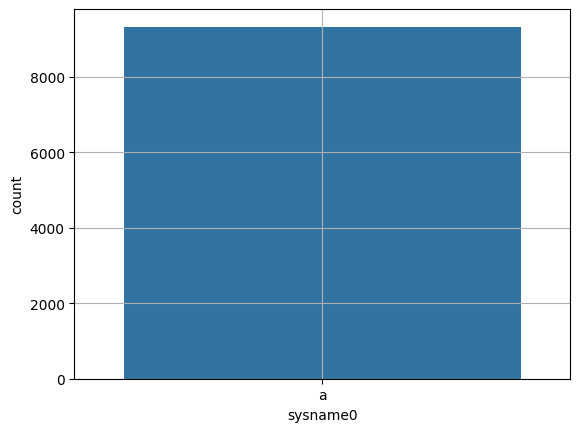

--------------------------------------------------


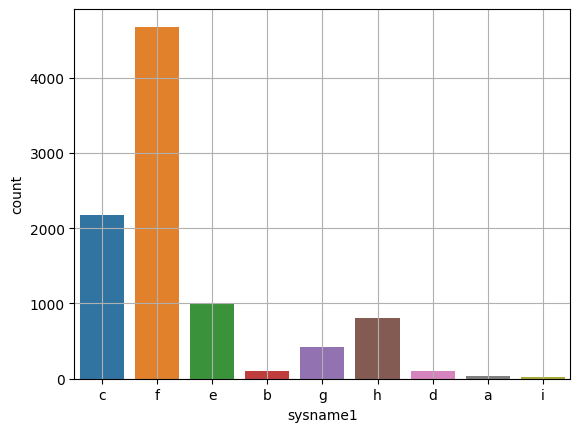

--------------------------------------------------


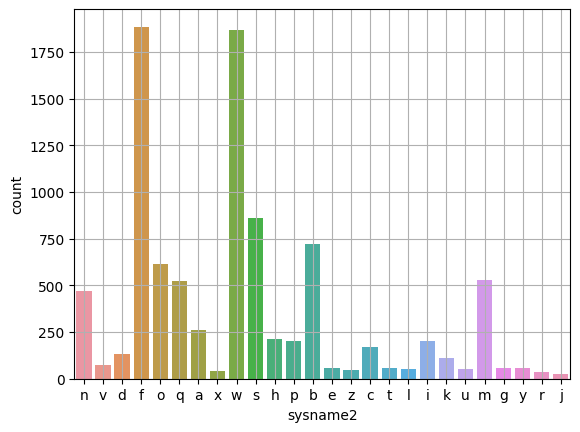

--------------------------------------------------


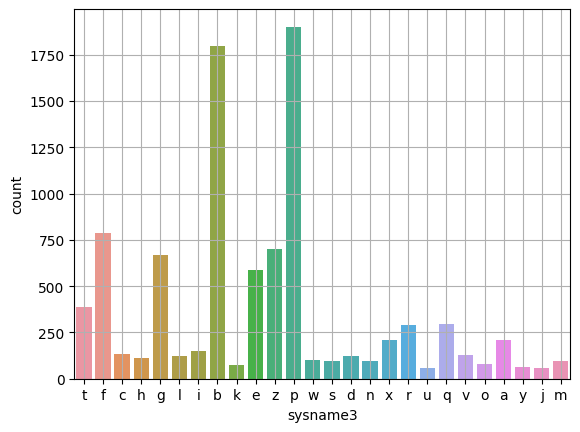

--------------------------------------------------


In [211]:
# 첫번째 글자는 a로 통일 되어 있다.
# 두번째 글자는 a b c d e f g h i 까지 존재한다.
# 세번째와 네번째 글자는 26가지의 알파벳이 모두 존재한다.
for i in range(4):
    eda1_c(f'sysname{i}', train)
    print('-' * 50)

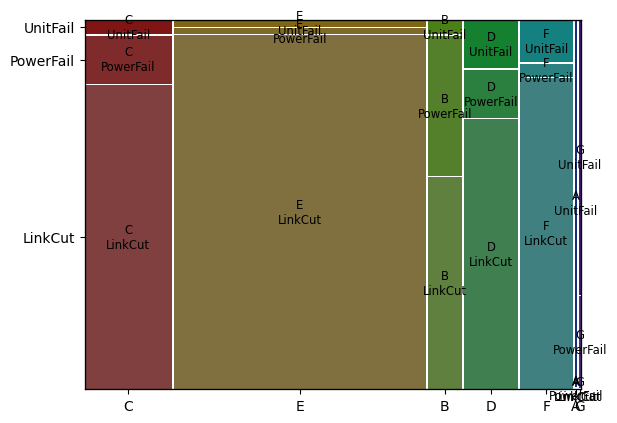

카이제곱통계량 2521.9097172729053
p-value 0.0
기대빈도
 [[2.95211328e+01 2.64792963e+00 1.83093757e+00]
 [5.64374598e+02 5.06221841e+01 3.50032182e+01]
 [1.45695473e+03 1.30683115e+02 9.03621540e+01]
 [9.02131088e+02 8.09176142e+01 5.59512980e+01]
 [4.23020468e+03 3.79432740e+02 2.62362583e+02]
 [8.83029178e+02 7.92042480e+01 5.47665737e+01]
 [2.77845956e+01 2.49216906e+00 1.72323536e+00]]
--------------------------------------------------


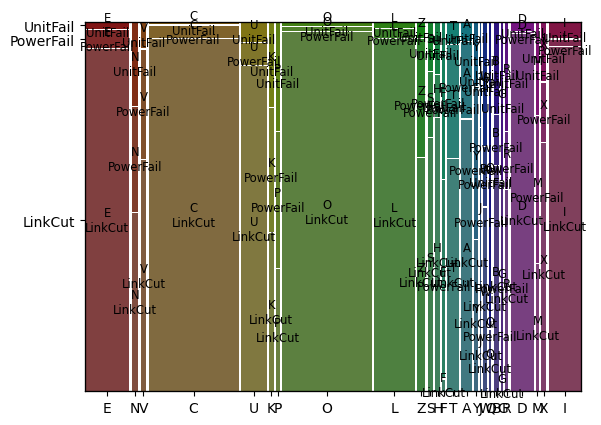

카이제곱통계량 3447.844882774768
p-value 0.0
기대빈도
 [[1.97096975e+02 1.76788243e+01 1.22242008e+01]
 [1.03323965e+02 9.26775370e+00 6.40828148e+00]
 [1.65318344e+03 1.48284059e+02 1.02532504e+02]
 [4.28056426e+02 3.83949796e+01 2.65485947e+01]
 [8.19645570e+02 7.35189873e+01 5.08354430e+01]
 [5.47009225e+01 4.90645784e+00 3.39261961e+00]
 [3.21259386e+01 2.88157048e+00 1.99249088e+00]
 [8.50903240e+01 7.63226775e+00 5.27740828e+00]
 [5.91290925e+02 5.30364729e+01 3.66726024e+01]
 [1.82336408e+01 1.63548595e+00 1.13087320e+00]
 [8.24855181e+01 7.39862690e+00 5.11585497e+00]
 [7.37160051e+02 6.61203604e+01 4.57195881e+01]
 [4.77547737e+01 4.28341558e+00 2.96181077e+00]
 [1.21557606e+02 1.09032396e+01 7.53915469e+00]
 [1.65578824e+03 1.48517700e+02 1.02694057e+02]
 [7.29345634e+01 6.54194379e+00 4.52349281e+00]
 [3.64672817e+01 3.27097189e+00 2.26174641e+00]
 [5.55691912e+01 4.98433812e+00 3.44647071e+00]
 [1.03323965e+02 9.26775370e+00 6.40828148e+00]
 [2.14462347e+02 1.92364300e+01 1.33012229e+

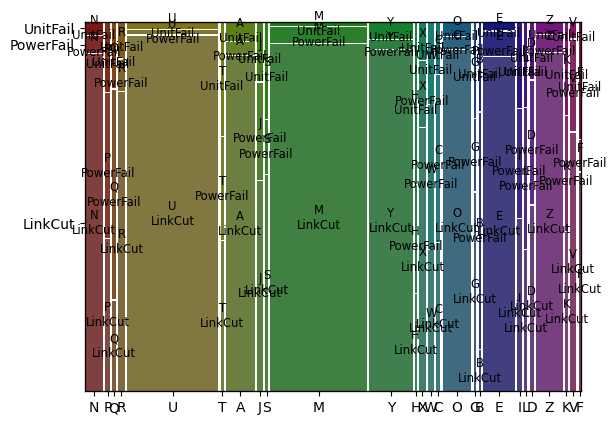

카이제곱통계량 2717.3922514399005
p-value 0.0
기대빈도
 [[ 536.59000215   48.13001502   33.27998284]
 [  39.07208753    3.50461274    2.42329972]
 [  85.95859258    7.71014804    5.33125939]
 [  77.27590646    6.9313452     4.79274834]
 [ 590.42265608   52.95859258   36.61875134]
 [  40.80862476    3.66037331    2.53100193]
 [  52.96438533    4.75069728    3.2849174 ]
 [  29.5211328     2.64792963    1.83093757]
 [  81.61724952    7.32074662    5.06200386]
 [ 101.58742759    9.11199313    6.30057927]
 [  58.173997      5.21797897    3.60802403]
 [  63.38360867    5.68526067    3.93113066]
 [1774.74104269  159.18729886  110.07165844]
 [ 336.88822141   30.21754988   20.89422871]
 [ 526.1707788    47.19545162   32.63376958]
 [  85.95859258    7.71014804    5.33125939]
 [  66.85668312    5.99678181    4.14653508]
 [ 121.55760566   10.90323965    7.53915469]
 [  59.04226561    5.29585926    3.66187513]
 [  52.96438533    4.75069728    3.2849174 ]
 [1679.23149539  150.62046771  104.1480369 ]
 [ 114.611

In [212]:
# 두번째에서 네번째 글자는 시각적으로 봤을 때 타켓 변수와 유의미한 연관성을 가지는 것으로 보여진다.
# 그러나 세번째 글자와 네번째 글자의 범주 수가 너무 많아 통계량 값이 폭발했다.
for i in range(1, 4):
    cat_cat(f'site{i}', target, train)
    print('-' * 50)

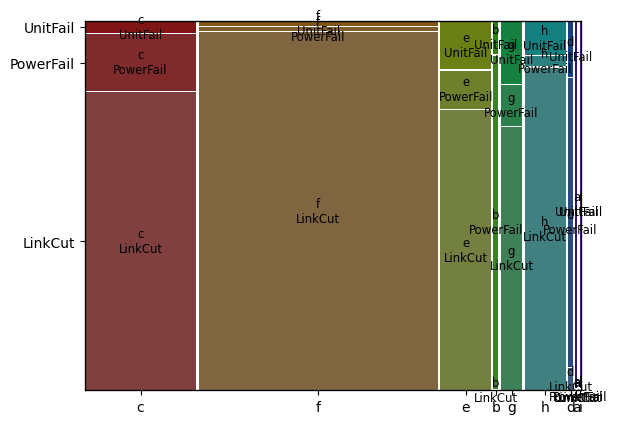

카이제곱통계량 3703.8255836780245
p-value 0.0
기대빈도
 [[3.12576700e+01 2.80369020e+00 1.93863978e+00]
 [8.50903240e+01 7.63226775e+00 5.27740828e+00]
 [1.88935250e+03 1.69467496e+02 1.17180004e+02]
 [8.50903240e+01 7.63226775e+00 5.27740828e+00]
 [8.62190732e+02 7.73351212e+01 5.34741472e+01]
 [4.06176057e+03 3.64323965e+02 2.51915469e+02]
 [3.62068011e+02 3.24760781e+01 2.24559107e+01]
 [6.96351427e+02 6.24599871e+01 4.31885861e+01]
 [2.08384467e+01 1.86912680e+00 1.29242652e+00]]
--------------------------------------------------


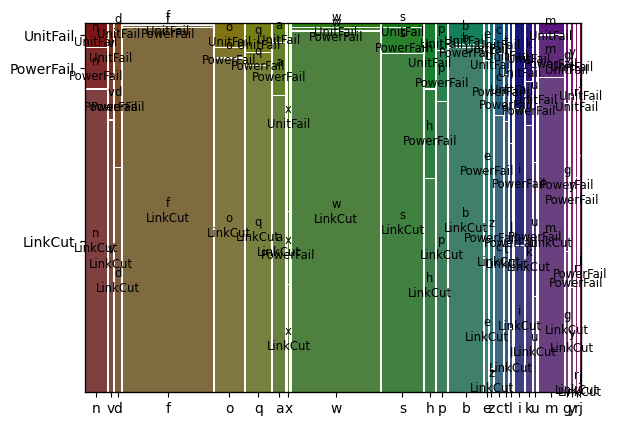

카이제곱통계량 3200.8396460093672
p-value 0.0
기대빈도
 [[2.28354645e+02 2.04825145e+01 1.41628406e+01]
 [6.27758206e+02 5.63074448e+01 3.89343489e+01]
 [1.47605664e+02 1.32396481e+01 9.15468784e+00]
 [1.13743188e+02 1.02023171e+01 7.05449474e+00]
 [5.12278481e+01 4.59493671e+00 3.17721519e+00]
 [1.63755460e+03 1.46882214e+02 1.01563184e+02]
 [4.77547737e+01 4.28341558e+00 2.96181077e+00]
 [1.84072946e+02 1.65106200e+01 1.14164342e+01]
 [1.76258528e+02 1.58096975e+01 1.09317743e+01]
 [2.17067153e+01 1.94700708e+00 1.34627762e+00]
 [9.81143531e+01 8.80047200e+00 6.08517486e+00]
 [4.51499678e+01 4.04977473e+00 2.80025746e+00]
 [4.60182364e+02 4.12765501e+01 2.85410856e+01]
 [4.09822785e+02 3.67594937e+01 2.54177215e+01]
 [5.31380390e+02 4.76627333e+01 3.29568762e+01]
 [1.74521991e+02 1.56539369e+01 1.08240721e+01]
 [4.53236215e+02 4.06535078e+01 2.81102768e+01]
 [3.29942073e+01 2.95945076e+00 2.04634199e+00]
 [7.45842738e+02 6.68991633e+01 4.62580991e+01]
 [4.94913109e+01 4.43917614e+00 3.06951298e

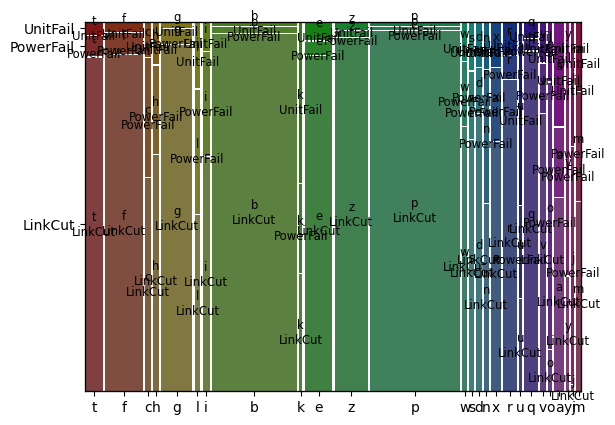

카이제곱통계량 3242.5313074553173
p-value 0.0
기대빈도
 [[ 179.73160266   16.12121862   11.14717872]
 [1560.27869556  139.95086891   96.77043553]
 [ 118.08453122   10.59171852    7.32375027]
 [ 105.92877065    9.50139455    6.5698348 ]
 [ 509.67367518   45.71572624   31.61059858]
 [ 684.19566617   61.36966316   42.43467067]
 [ 578.26689552   51.86826861   35.86483587]
 [  97.24608453    8.72259172    6.03132375]
 [ 129.37202317   11.6041622     8.02381463]
 [  51.2278481     4.59493671    3.17721519]
 [  65.12014589    5.84102124    4.03883287]
 [ 105.06050204    9.42351427    6.51598369]
 [  82.48551813    7.3986269     5.11585497]
 [  81.61724952    7.32074662    5.06200386]
 [  69.46148895    6.23042266    4.30808839]
 [1651.44689981  148.12829865  102.42480154]
 [ 255.27097189   22.89680326   15.83222484]
 [ 250.92962884   22.50740185   15.56296932]
 [  85.09032396    7.63226775    5.27740828]
 [ 334.28341558   29.98390903   20.73267539]
 [  52.09611671    4.67281699    3.23106629]
 [ 109.401

In [213]:
# 두번째에서 네번째 글자는 시각적으로 봤을 때 타켓 변수와 유의미한 연관성을 가지는 것으로 보여진다.
# 그러나 세번째 글자와 네번째 글자의 범주 수가 너무 많아 통계량 값이 폭발했다.
for i in range(1, 4):
    cat_cat(f'sysname{i}', target, train)
    print('-' * 50)

In [214]:
site_col_dict = {}
for i in range(4):
    site_col_dict[f'site{i}'] = []


for idx, value in test['site'].items():
    for num, each_char in enumerate(value):
        site_col_dict[f'site{num}'].append(each_char)
site_df = pd.DataFrame(site_col_dict)

In [215]:
sysname_col_dict = {}
for i in range(4):
    sysname_col_dict[f'sysname{i}'] = []


for idx, value in test['sysname'].items():
    for num, each_char in enumerate(value):
        sysname_col_dict[f'sysname{num}'].append(each_char)

sysname_df = pd.DataFrame(sysname_col_dict)

In [216]:
test = pd.concat([test, site_df, sysname_df], axis=1)
test

,ticketno,alarmno,alarmtime,alarmlevel,alarmmsg_original,site,sysname,unit,slot,port,...,alarmday,alarmhour,site0,site1,site2,site3,sysname0,sysname1,sysname2,sysname3
0,21812391.0,1671894138838,2022-12-25 00:02:16+09:00,5,Loss Of Signal,AEAQ,afbd,r1sr1sl16/ETHLocPort#15#1,16.0,15.0,...,25,0,A,E,A,Q,a,f,b,d
1,21775988.0,1671894172511,2022-12-25 00:02:51+09:00,5,Loss Of Signal,ADZW,aezn,r1sr1sl13/ETHLocPort#20#1,13.0,20.0,...,25,0,A,D,Z,W,a,e,z,n
2,21792259.0,1671894204682,2022-12-25 00:03:22+09:00,4,DDM_RX_PWR_HIGH,AECE,afeg,X2FUA,2.0,1.0,...,25,0,A,E,C,E,a,f,e,g
3,21812412.0,1671894215702,2022-12-25 00:03:33+09:00,5,BATT_ENV_FAIL,ACCN,aclp,---,NaN,NaN,...,25,0,A,C,C,N,a,c,l,p
4,21812417.0,1671894220812,2022-12-25 00:03:39+09:00,5,Loss Of Signal,AEAQ,afbd,r1sr1sl16/ETHLocPort#16#1,16.0,16.0,...,25,0,A,E,A,Q,a,f,b,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37666,21986223.0,1672412311698,2022-12-30 23:58:30+09:00,5,Loss Of Signal,ADZW,aezn,r1sr1sl13/ETHLocPort#20#1,13.0,20.0,...,30,23,A,D,Z,W,a,e,z,n
37667,22015278.0,1672412316271,2022-12-30 23:58:33+09:00,4,DDM_RX_PWR_HIGH,AEMD,afsr,G16FU,5.0,6.0,...,30,23,A,E,M,D,a,f,s,r
37668,21986426.0,1672412317238,2022-12-30 23:58:34+09:00,5,MEP_LSP_RDI,ACMY,acxj,G2FUA,1.0,1.0,...,30,23,A,C,M,Y,a,c,x,j
37669,22015300.0,1672412373531,2022-12-30 23:59:32+09:00,5,Loss Of Signal,AEAQ,afbd,r1sr1sl16/ETHLocPort#16#1,16.0,16.0,...,30,23,A,E,A,Q,a,f,b,d


TRAIN :


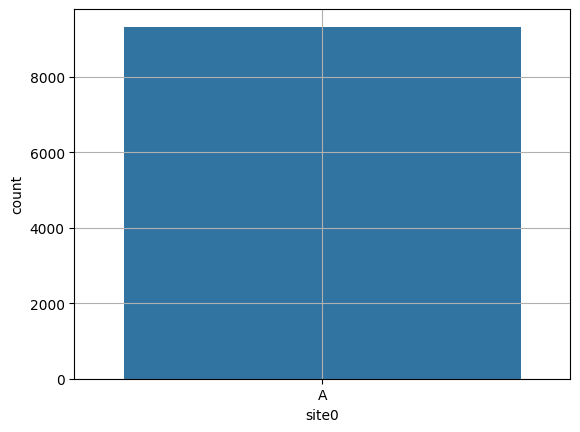


TEST :


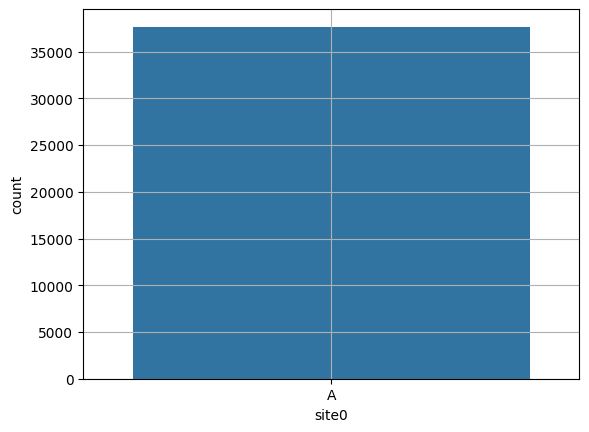

--------------------------------------------------
TRAIN :


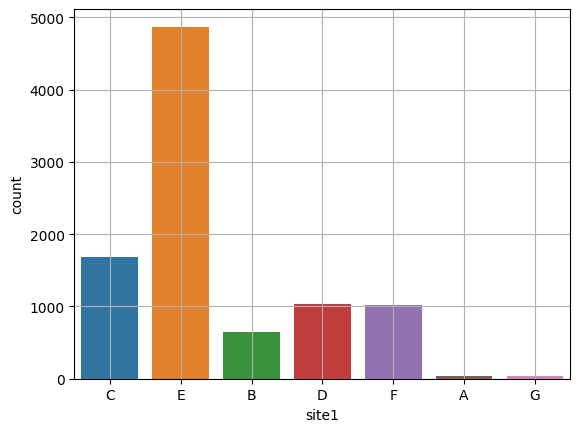


TEST :


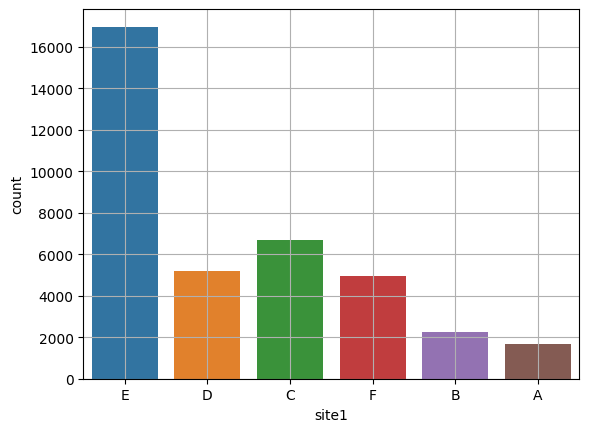

--------------------------------------------------
TRAIN :


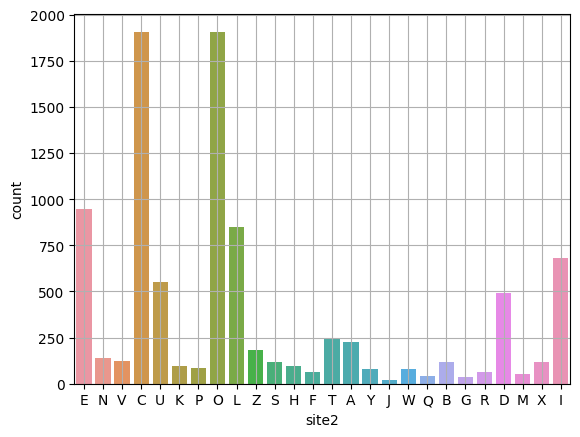


TEST :


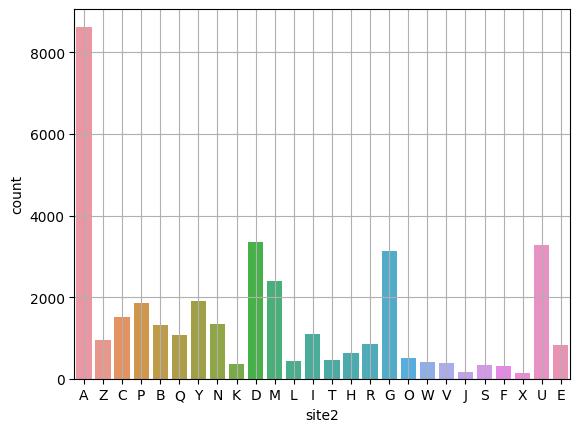

--------------------------------------------------
TRAIN :


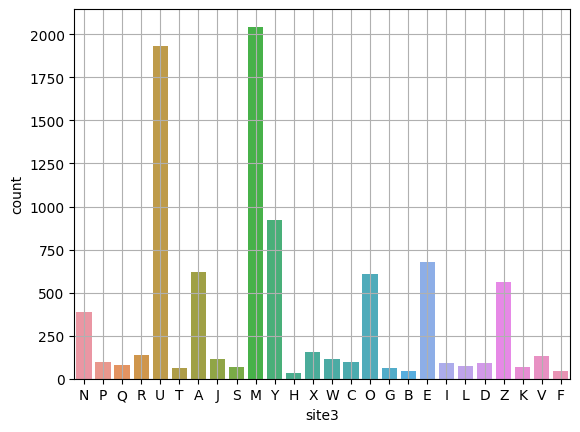


TEST :


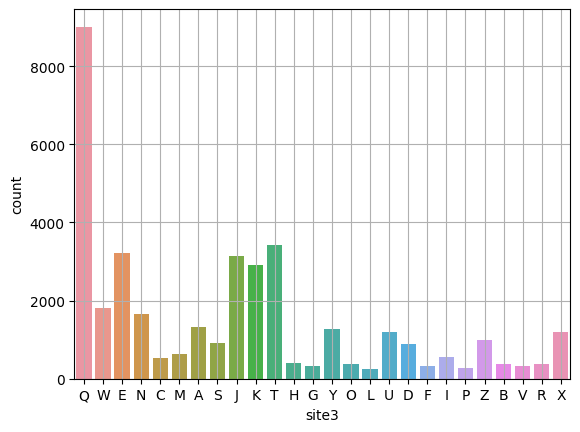

--------------------------------------------------


In [217]:
# test 데이터와 비교했을 때, 두번째 글자에서 범주의 수가 약간 다르고, 각 글자의 분포가 달라진다.
for i in range(4):
    print('TRAIN :')
    eda1_c(f'site{i}', train)
    print('\nTEST :')
    eda1_c(f'site{i}', test)
    print('-' * 50)

TRAIN :


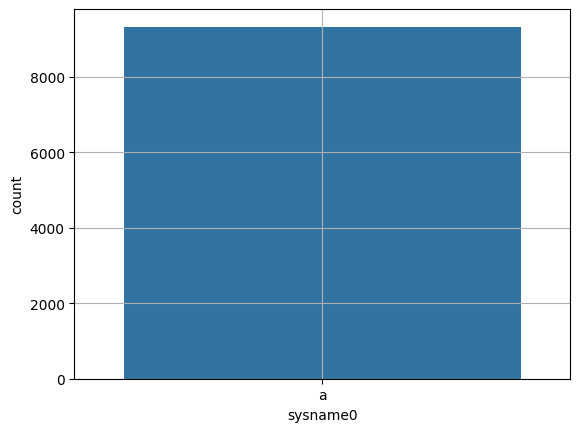


TEST :


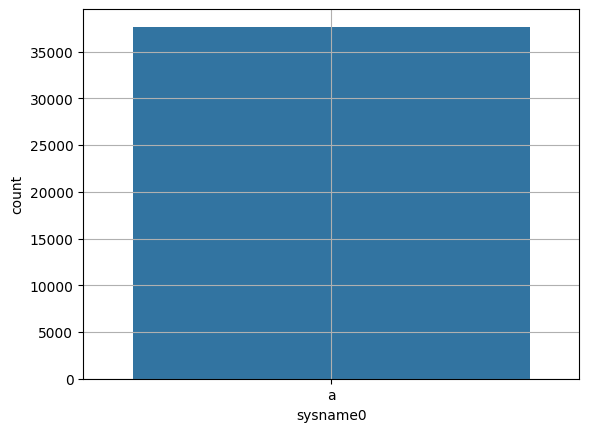

--------------------------------------------------
TRAIN :


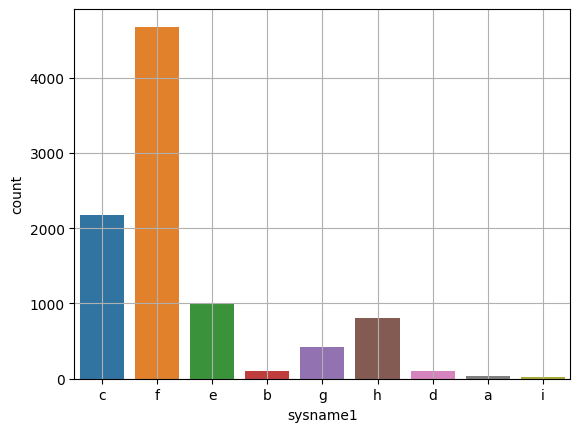


TEST :


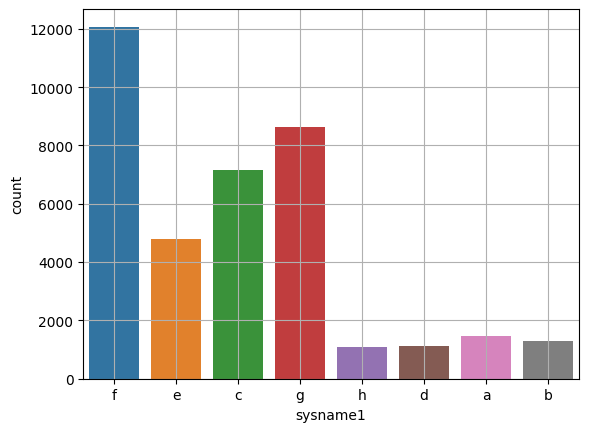

--------------------------------------------------
TRAIN :


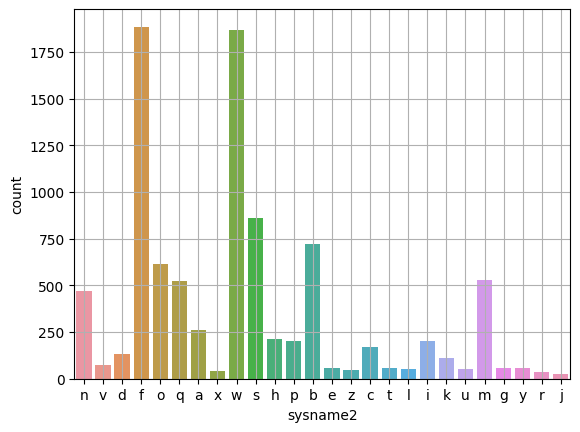


TEST :


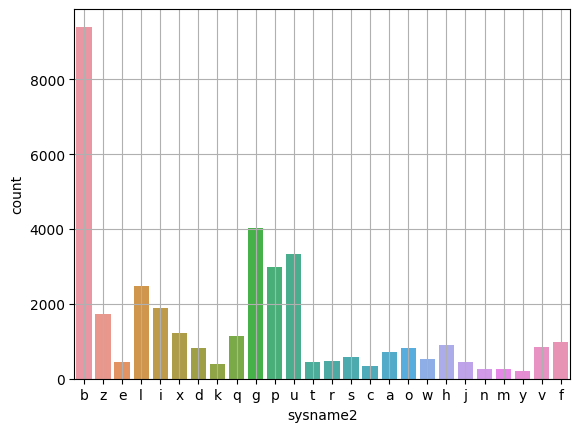

--------------------------------------------------
TRAIN :


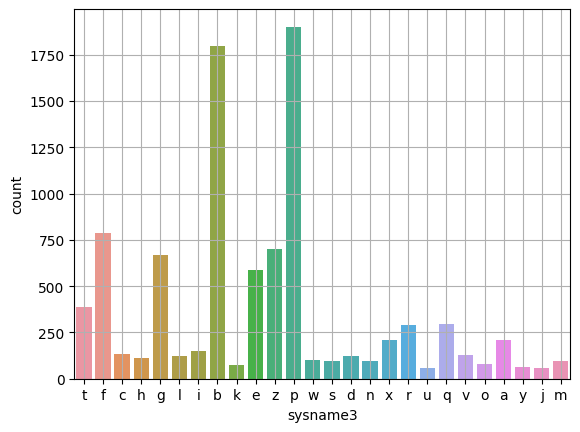


TEST :


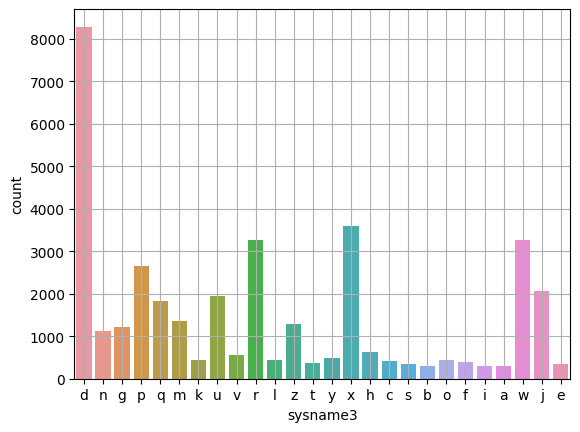

--------------------------------------------------


In [218]:
# site와 비슷한 양상이다.
for i in range(4):
    print('TRAIN :')
    eda1_c(f'sysname{i}', train)
    print('\nTEST :')
    eda1_c(f'sysname{i}', test)
    print('-' * 50)

TRAIN :


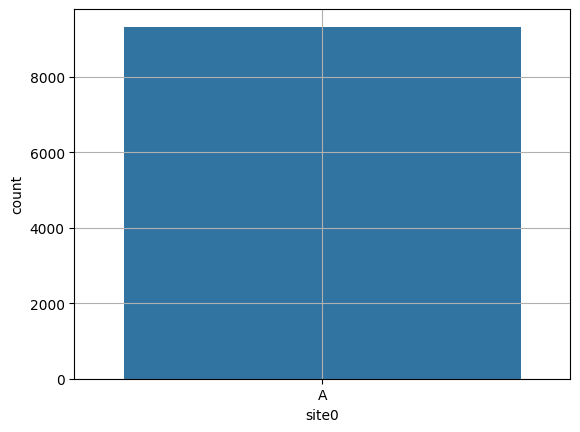


TEST_a :


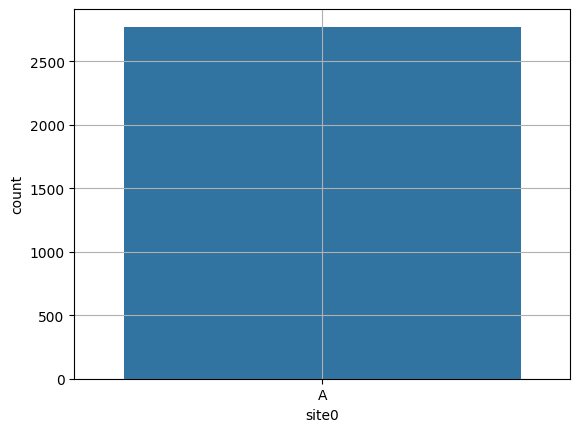


TEST_b :


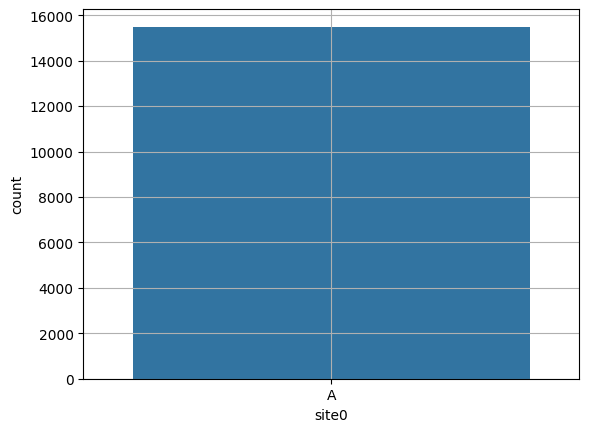


TEST_c :


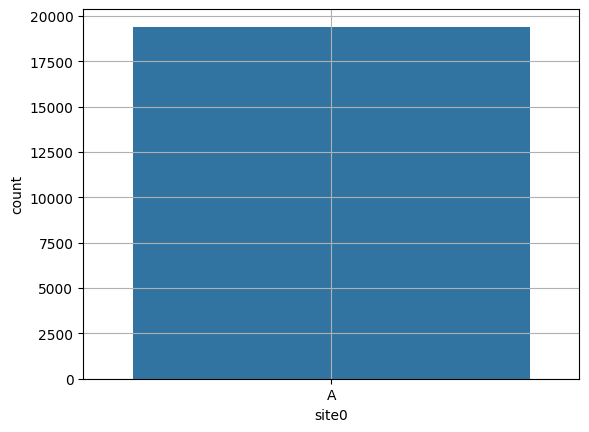

--------------------------------------------------
TRAIN :


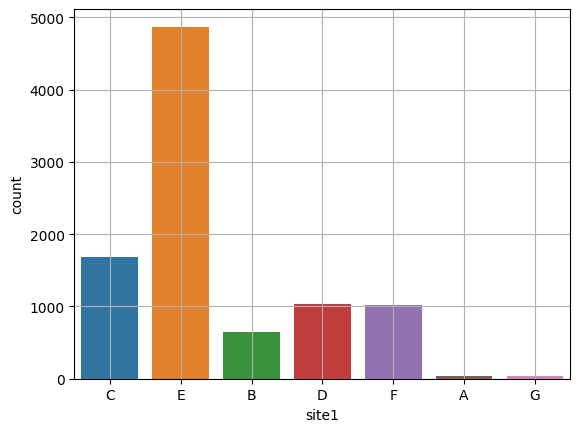


TEST_a :


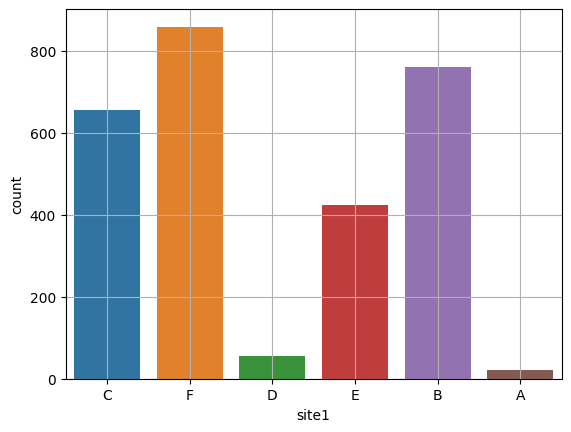


TEST_b :


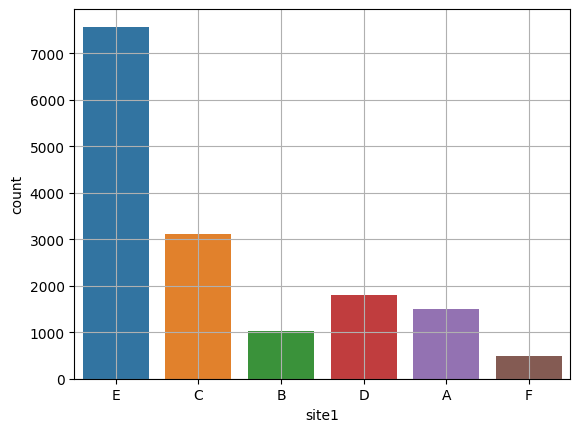


TEST_c :


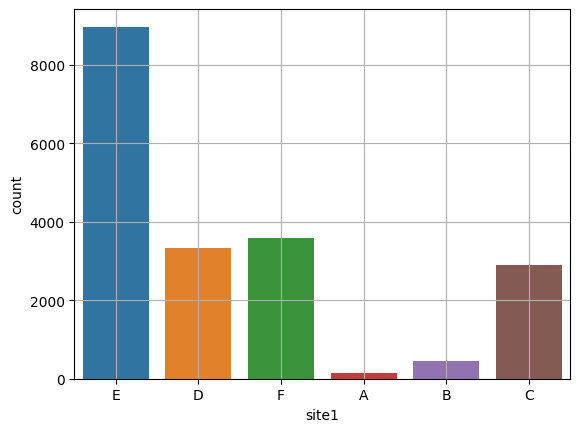

--------------------------------------------------
TRAIN :


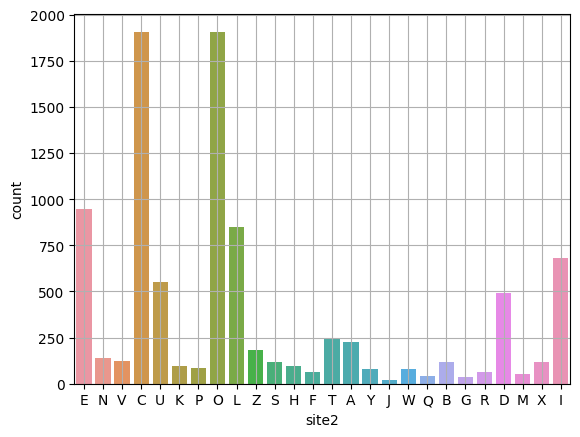


TEST_a :


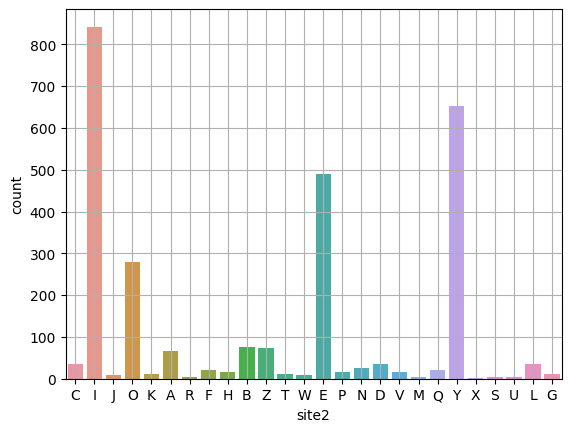


TEST_b :


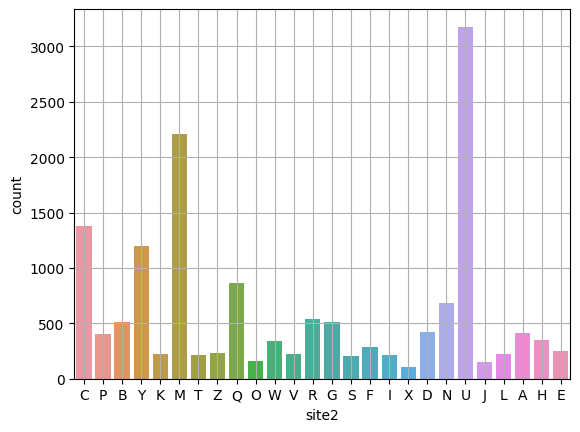


TEST_c :


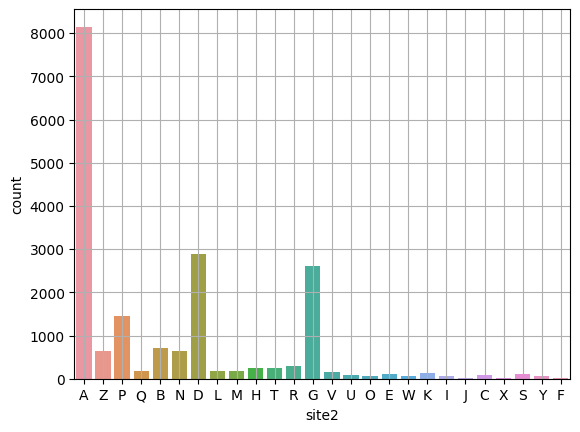

--------------------------------------------------
TRAIN :


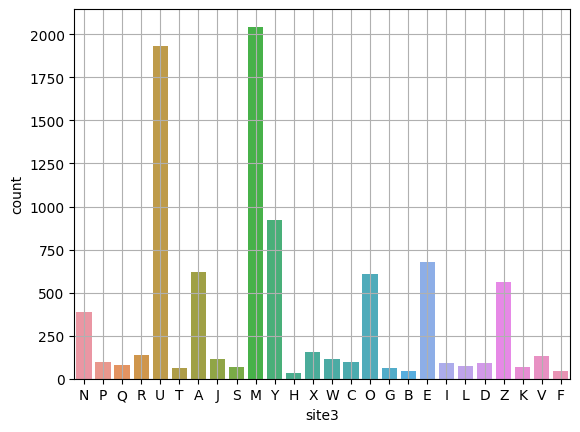


TEST_a :


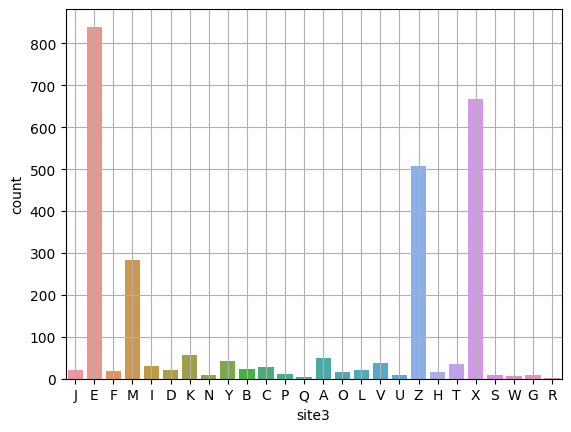


TEST_b :


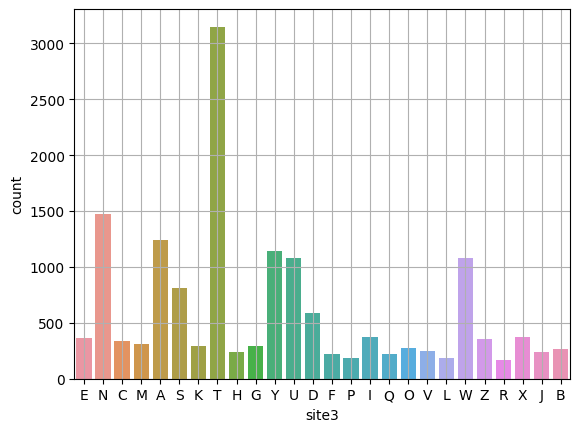


TEST_c :


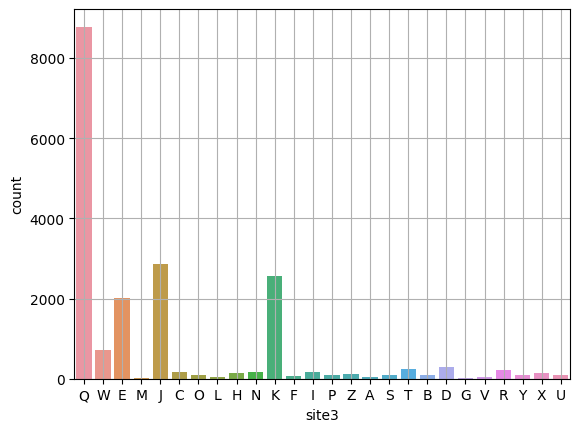

--------------------------------------------------


In [219]:
# 장비 제조사 별로 지배적인 범주의 유형이 다르다.
# sysname도 별반 다르지 않다.
for i in range(4):
    print('TRAIN :')
    eda1_c(f'site{i}', train)
    print('\nTEST_a :')
    eda1_c(f'site{i}', test.loc[test['root_cause_domain'] == 'A'])
    print('\nTEST_b :')
    eda1_c(f'site{i}', test.loc[test['root_cause_domain'] == 'B'])
    print('\nTEST_c :')
    eda1_c(f'site{i}', test.loc[test['root_cause_domain'] == 'C'])
    print('-' * 50)

TRAIN :


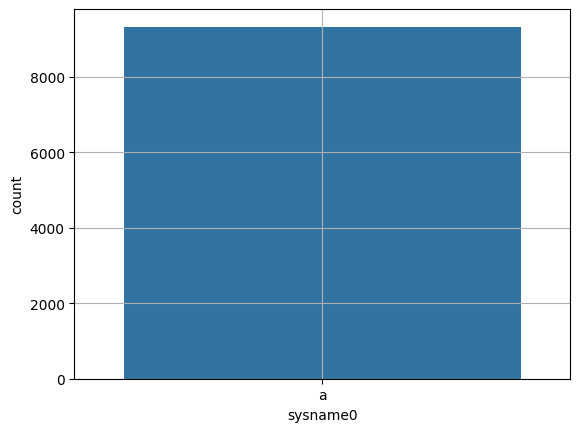


TEST_a :


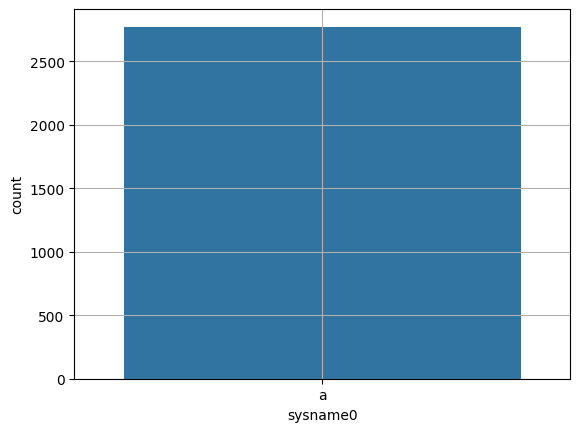


TEST_b :


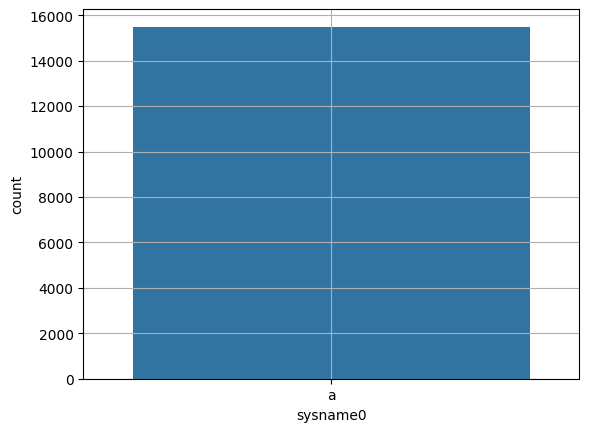


TEST_c :


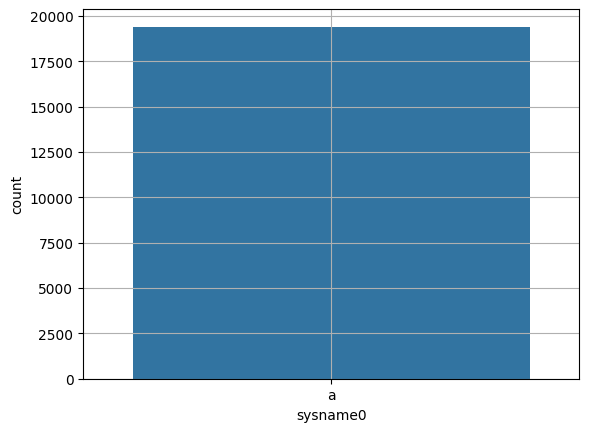

--------------------------------------------------
TRAIN :


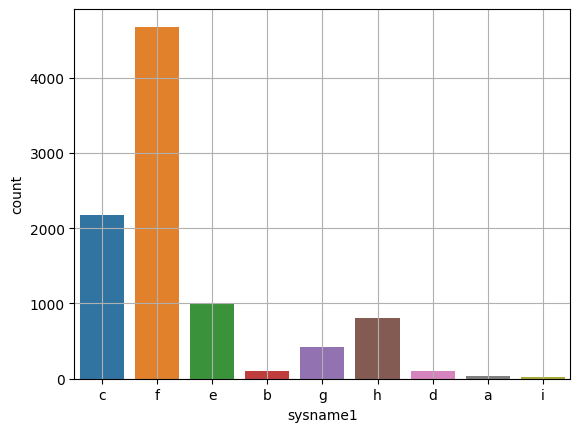


TEST_a :


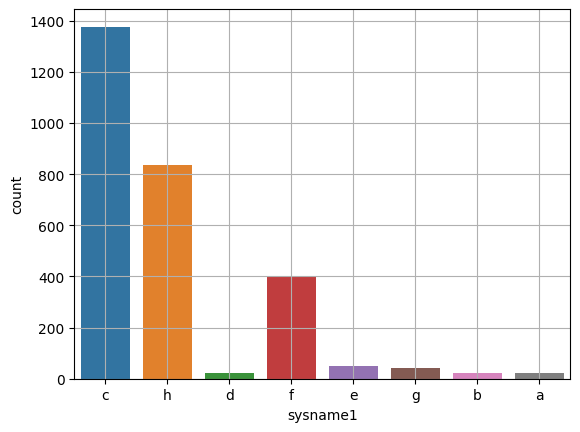


TEST_b :


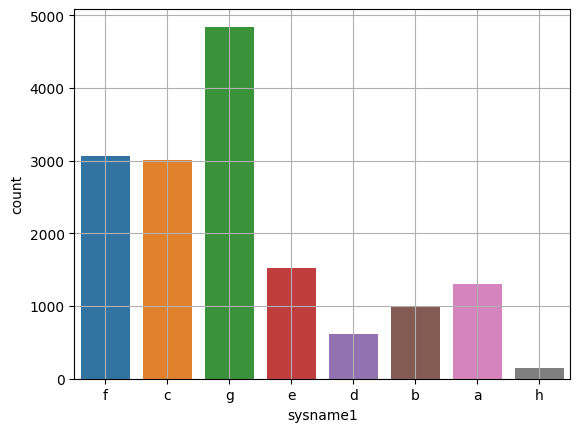


TEST_c :


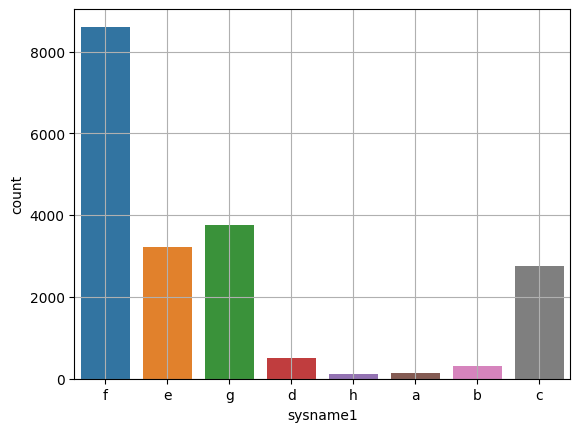

--------------------------------------------------
TRAIN :


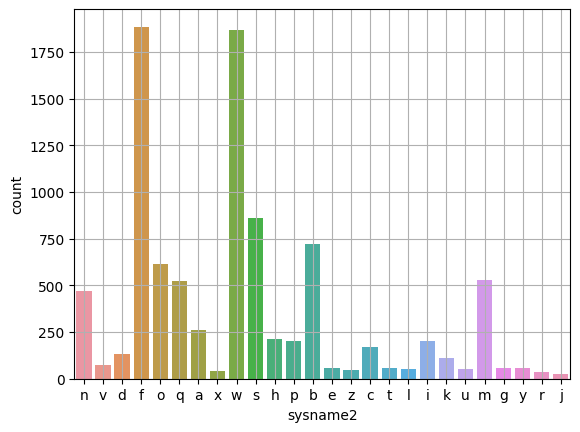


TEST_a :


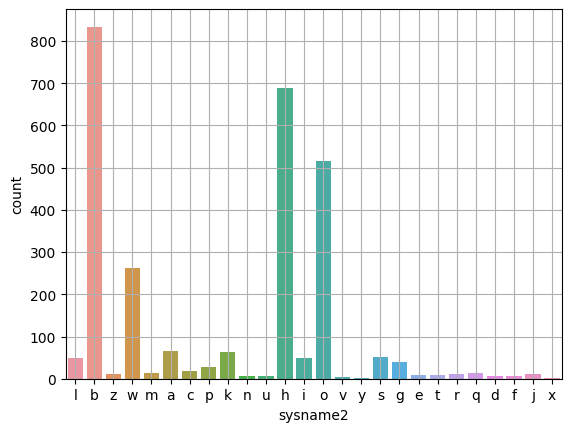


TEST_b :


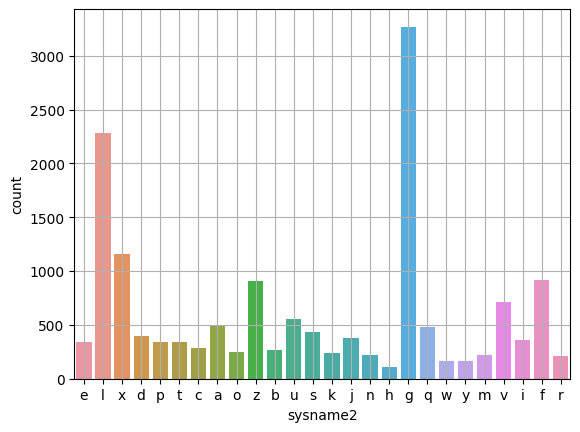


TEST_c :


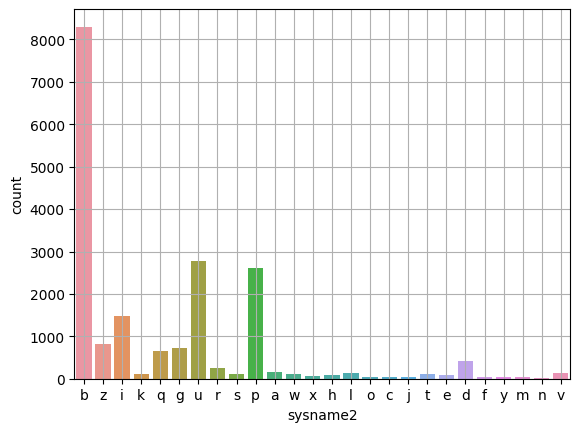

--------------------------------------------------
TRAIN :


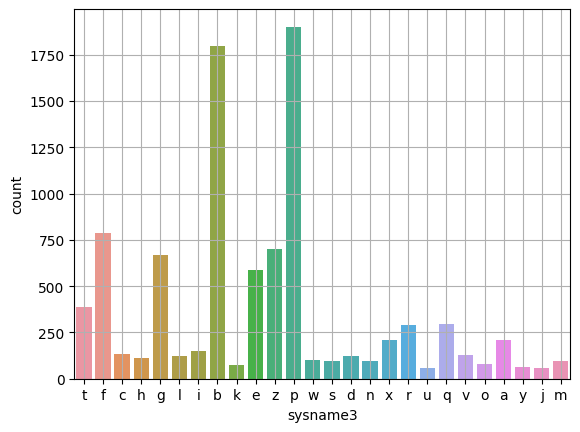


TEST_a :


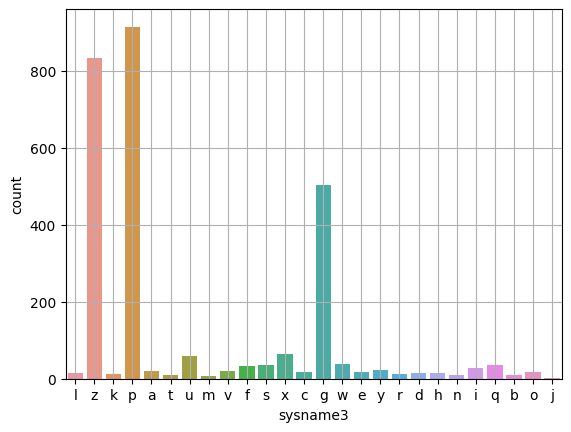


TEST_b :


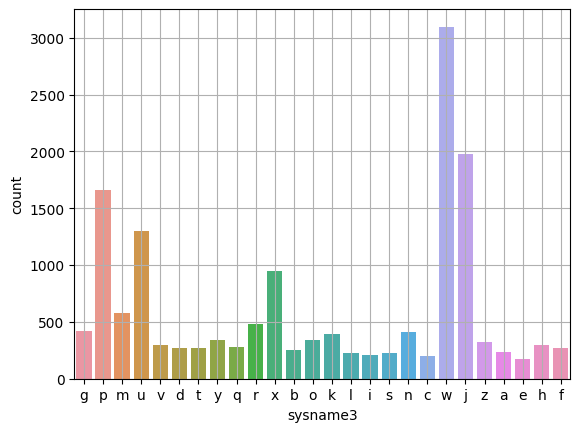


TEST_c :


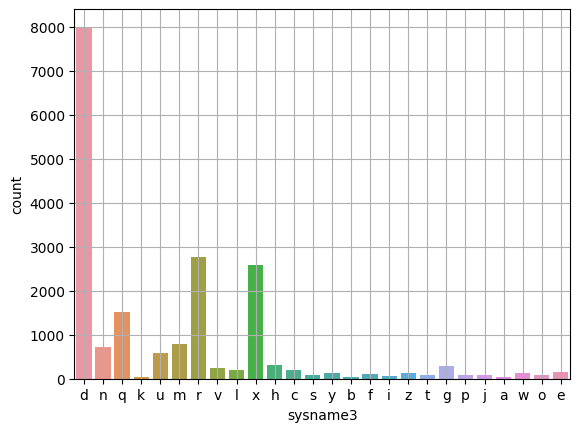

--------------------------------------------------


In [220]:
for i in range(4):
    print('TRAIN :')
    eda1_c(f'sysname{i}', train)
    print('\nTEST_a :')
    eda1_c(f'sysname{i}', test.loc[test['root_cause_domain'] == 'A'])
    print('\nTEST_b :')
    eda1_c(f'sysname{i}', test.loc[test['root_cause_domain'] == 'B'])
    print('\nTEST_c :')
    eda1_c(f'sysname{i}', test.loc[test['root_cause_domain'] == 'C'])
    print('-' * 50)

## unit
- 경보가 발생한 유니트명을 나타냅니다. 사용하는 명칭은 장치 제조사마다 다릅니다.

In [221]:
train['unit'].value_counts().index.to_list()

['EQPT', 'NODE']

In [222]:
# 테스트 데이터에서는 unit 변수에 대한 값의 범주가 매우 다양하다.
# 각 범주값 안에 추출할 수 있는 정보들이 있는 것으로 보인다.
test['unit'].value_counts().index.to_list()

['G4FUA',
 'G4TU',
 'EQPT',
 'r1sr1sl13/ETHLocPort#9#1',
 'GFU40',
 'G2FUA',
 'r1sr1sl17/ETHLocPort#14#1',
 'r1sr1sl17/ETHLocPort#16#1',
 '---',
 'r1sr1sl17/ETHLocPort#19#1',
 'r1sr1sl16/ETHLocPort#15#1',
 'r1sr1sl17/ETHLocPort#18#1',
 'r1sr1sl19/ETHLocPort#12#1',
 'r1sr1sl19/ETHLocPort#14#1',
 'r1sr1sl19/ETHLocPort#16#1',
 'X2FUA',
 'r1sr1sl16/ETHLocPort#16#1',
 'r1sr1sl16/ETHLocPort#18#1',
 'r1sr1sl16/ETHLocPort#19#1',
 'r1sr1sl17/ETHLocPort#12#1',
 'r1sr1sl17/ETHLocPort#17#1',
 'r1sr1sl16/ETHLocPort#14#1',
 'r1sr1sl17/ETHLocPort#15#1',
 'r1sr1sl13/ETHLocPort#20#1',
 'r1sr1sl17/ETHLocPort#11#1',
 'X4FUA',
 'r1sr1sl2/ETHLocPort#8#1',
 'G16FU',
 'XFU-A',
 'X10EU',
 'r1sr1sl2/ETHLocPort#9#1',
 'PSUAC',
 'GE12FU',
 'G16TU',
 'r1sr1sl15/ETHLocPort#3#1',
 'MCU',
 'STM1U',
 ' ',
 'r1sr1sl7/ETHLocPort#4#1',
 'r1sr1sl12/ETHLocPort#5#1',
 'G2TU',
 'MBU',
 'MEP#1#1#2',
 'r1sr1sl15/ETHLocPort#14#1',
 'CPI-1-1-1-2,ENV',
 'MEP#2#28#1',
 'r1sr1sl7/ETHLocPort#14#1',
 'r1sr1sl8/ETHLocPort#13#1',
 'r1

In [223]:
a['unit'].value_counts().index.to_list()

['EQPT', 'NODE']

In [224]:
b['unit'].value_counts().index.to_list()

['G4FUA',
 'G4TU',
 'GFU40',
 'G2FUA',
 '---',
 'X2FUA',
 'X4FUA',
 'G16FU',
 'XFU-A',
 'X10EU',
 'PSUAC',
 'GE12FU',
 'G16TU',
 'MCU',
 'STM1U',
 'G2TU',
 'MBU',
 'PSUDC',
 'G40FU',
 'X1FA',
 'SWU']

In [225]:
c['unit'].value_counts().index.to_list()

['r1sr1sl13/ETHLocPort#9#1',
 'r1sr1sl17/ETHLocPort#14#1',
 'r1sr1sl17/ETHLocPort#16#1',
 'r1sr1sl17/ETHLocPort#19#1',
 'r1sr1sl16/ETHLocPort#15#1',
 'r1sr1sl17/ETHLocPort#18#1',
 'r1sr1sl19/ETHLocPort#12#1',
 'r1sr1sl19/ETHLocPort#14#1',
 'r1sr1sl19/ETHLocPort#16#1',
 'r1sr1sl16/ETHLocPort#16#1',
 'r1sr1sl16/ETHLocPort#18#1',
 'r1sr1sl16/ETHLocPort#19#1',
 'r1sr1sl17/ETHLocPort#17#1',
 'r1sr1sl17/ETHLocPort#12#1',
 'r1sr1sl16/ETHLocPort#14#1',
 'r1sr1sl17/ETHLocPort#15#1',
 'r1sr1sl13/ETHLocPort#20#1',
 'r1sr1sl17/ETHLocPort#11#1',
 'r1sr1sl2/ETHLocPort#8#1',
 'r1sr1sl2/ETHLocPort#9#1',
 'r1sr1sl15/ETHLocPort#3#1',
 ' ',
 'r1sr1sl7/ETHLocPort#4#1',
 'r1sr1sl12/ETHLocPort#5#1',
 'MEP#1#1#2',
 'r1sr1sl15/ETHLocPort#14#1',
 'CPI-1-1-1-2,ENV',
 'r1sr1sl7/ETHLocPort#14#1',
 'MEP#2#28#1',
 'r1sr1sl8/ETHLocPort#13#1',
 'r1sr1sl2/ETHLocPort#1#1',
 'r1sr1sl2/ETHLocPort#2#1',
 'MEP#1#1#1',
 'r1sr1sl18/ETHLocPort#7#1',
 'r1sr1sl12/ETHLocPort#9#1',
 'r1sr1sl12/ETHLocPort#2#1',
 'r1sr1sl17/ETHLocP

In [226]:
# train 데이터내의 분포가 극히 불균형 하여 유의미한 변수로 사용하지 못할 것으로 판단된다.
train['unit'].value_counts()

EQPT    9320
NODE       2
Name: unit, dtype: int64

## slot
- 경보가 발생한 슬롯 번호를 나타냅니다. 사용하는 번호는 장치 제조사마다 다릅니다.

train



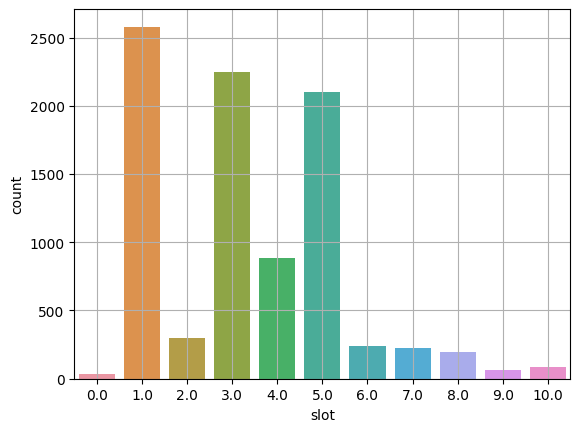

--------------------------------------------------
test



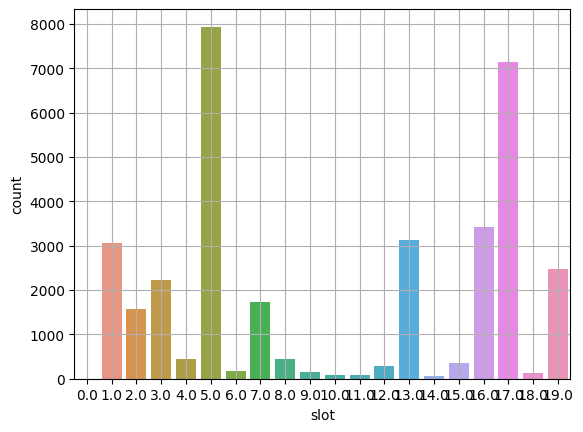

--------------------------------------------------
a



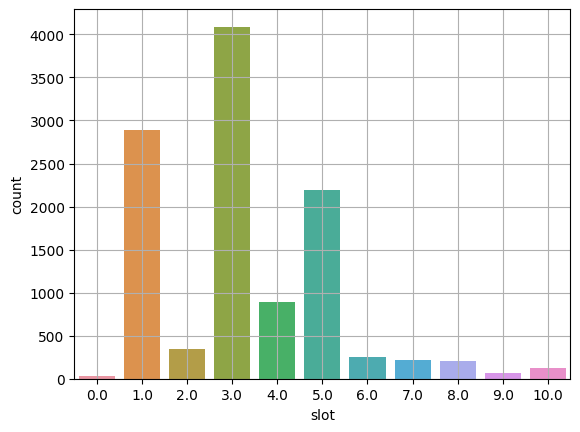

--------------------------------------------------
b



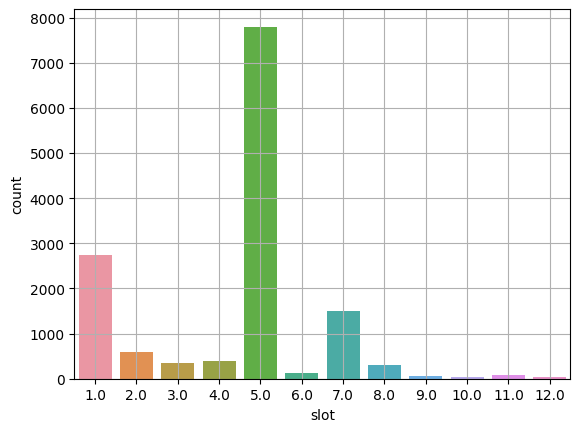

--------------------------------------------------
c



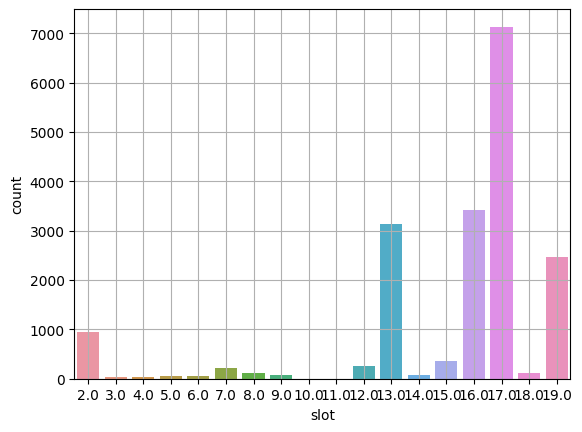

--------------------------------------------------


In [227]:
# 데이터 별로 범주의 분포가 다르다.
for name, data in zip(['train', 'test', 'a', 'b', 'c'],[train, test, a, b, c]):
    print(f'{name}\n')
    eda1_c('slot', data)
    print('-' * 50)

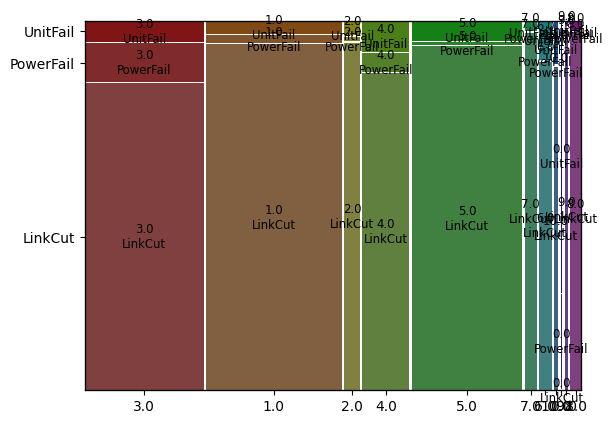

카이제곱통계량 739.6456865986568
p-value 8.929564871543006e-144
기대빈도
 [[2.80027911e+01 1.31171151e+00 1.68549738e+00]
 [2.32965156e+03 1.09125935e+02 1.40222508e+02]
 [2.70994753e+02 1.26939824e+01 1.63112649e+01]
 [2.03246065e+03 9.52048677e+01 1.22334487e+02]
 [8.02144468e+02 3.75741878e+01 4.82813442e+01]
 [1.89876990e+03 8.89425031e+01 1.14287596e+02]
 [2.15892486e+02 1.01128726e+01 1.29946411e+01]
 [2.00536117e+02 9.39354695e+00 1.20703361e+01]
 [1.77953221e+02 8.33571508e+00 1.07110640e+01]
 [5.87155298e+01 2.75036284e+00 3.53410740e+00]
 [7.58785308e+01 3.55431506e+00 4.56715418e+00]]


In [228]:
# slot 값은 타겟 범주의 분포에 영향을 미치는 것으로 보인다.
cat_cat('slot', target, train)

In [229]:
train['slot'].value_counts()

1.0     2579
3.0     2250
5.0     2102
4.0      888
2.0      300
6.0      239
7.0      222
8.0      197
10.0      84
9.0       65
0.0       31
Name: slot, dtype: int64

In [230]:
test['slot'].value_counts()

5.0     7939
17.0    7134
16.0    3424
13.0    3131
1.0     3050
19.0    2470
3.0     2237
7.0     1722
2.0     1569
4.0      436
8.0      434
15.0     358
12.0     293
6.0      184
9.0      149
18.0     122
11.0      89
10.0      77
14.0      69
0.0        3
Name: slot, dtype: int64

In [231]:
a['slot'].value_counts()

3.0     4089
1.0     2895
5.0     2196
4.0      895
2.0      341
6.0      248
7.0      223
8.0      209
10.0     119
9.0       68
0.0       34
Name: slot, dtype: int64

In [232]:
b['slot'].value_counts()

5.0     7797
1.0     2734
7.0     1509
2.0      581
4.0      391
3.0      357
8.0      306
6.0      122
11.0      85
9.0       69
10.0      40
12.0      32
Name: slot, dtype: int64

In [233]:
c['slot'].value_counts()

17.0    7134
16.0    3424
13.0    3131
19.0    2470
2.0      947
15.0     358
12.0     261
7.0      212
18.0     122
8.0      116
9.0       77
14.0      69
6.0       53
5.0       48
3.0       41
4.0       38
11.0       4
10.0       2
Name: slot, dtype: int64

## port
- 경보가 발생한 포트 번호를 나타냅니다. 사용하는 번호는 장치 제조사마다 다릅니다.

train



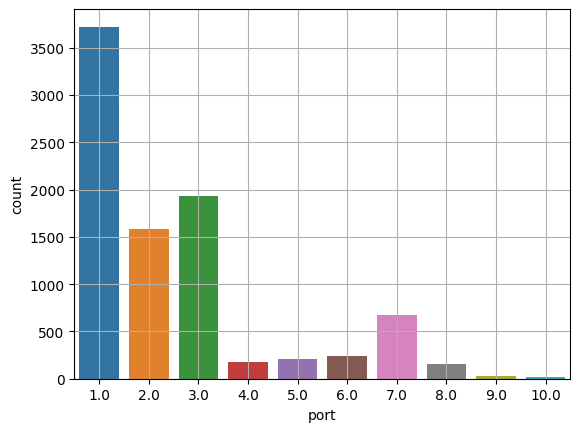

--------------------------------------------------
test



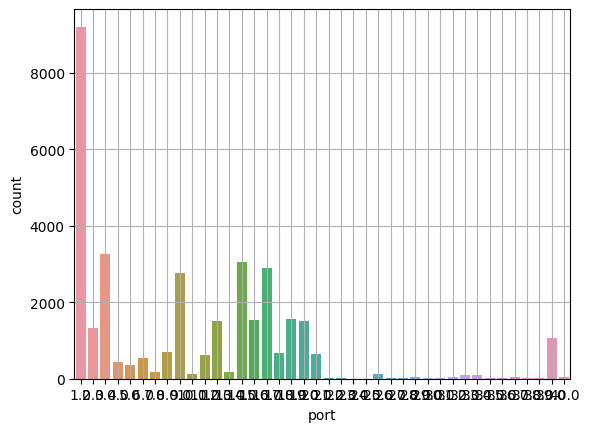

--------------------------------------------------
a



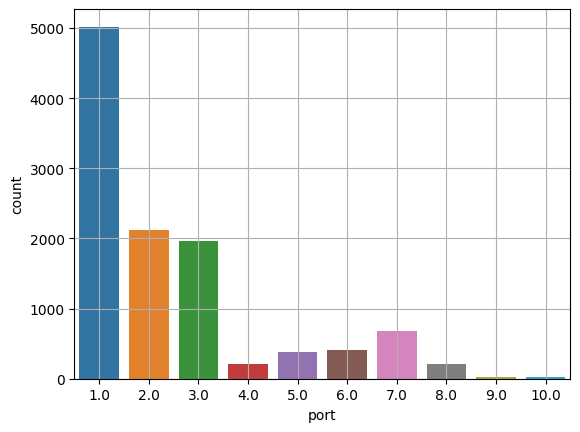

--------------------------------------------------
b



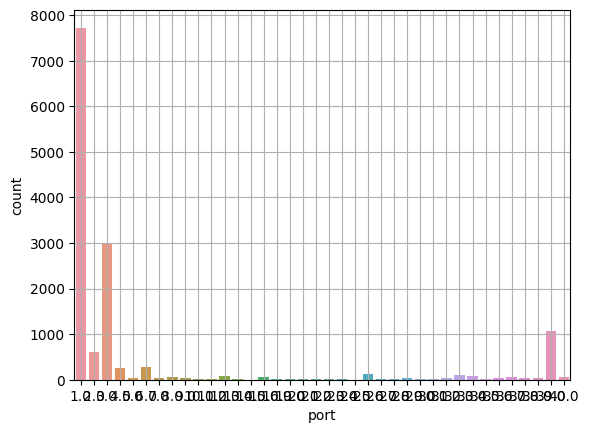

--------------------------------------------------
c



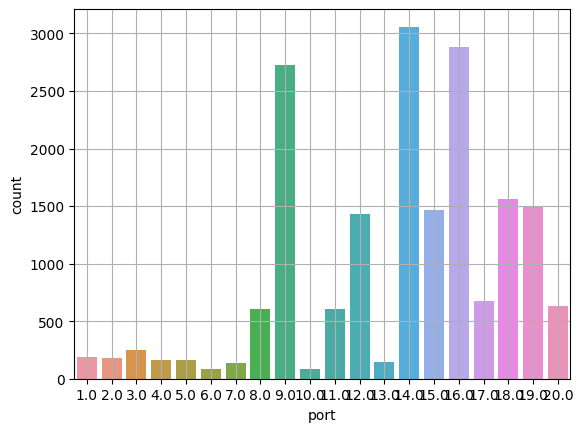

--------------------------------------------------


In [234]:
# 데이터 별로 범주의 범위가 다르다.
for name, data in zip(['train', 'test', 'a', 'b', 'c'],[train, test, a, b, c]):
    print(f'{name}\n')
    eda1_c('port', data)
    print('-' * 50)

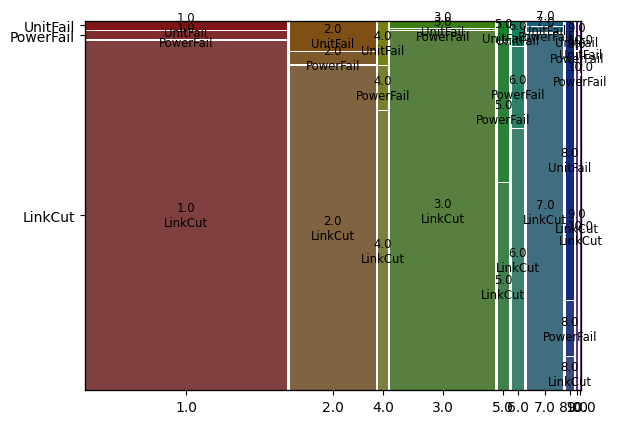

카이제곱통계량 2933.3661630954352
p-value 0.0
기대빈도
 [[3.39352550e+03 1.39495014e+02 1.88979484e+02]
 [1.44512034e+03 5.94034384e+01 8.04762178e+01]
 [1.75967335e+03 7.23335244e+01 9.79931232e+01]
 [1.59555874e+02 6.55873926e+00 8.88538682e+00]
 [1.94202292e+02 7.98292264e+00 1.08147851e+01]
 [2.14260745e+02 8.80744986e+00 1.19318052e+01]
 [6.11782808e+02 2.51480802e+01 3.40691117e+01]
 [1.41320917e+02 5.80916905e+00 7.86991404e+00]
 [2.27936963e+01 9.36962751e-01 1.26934097e+00]
 [1.27644699e+01 5.24699140e-01 7.10830946e-01]]


In [235]:
# port 값은 타겟 범주의 분포에 영향을 미치는 것으로 보인다.
cat_cat('port', target, train)

In [236]:
train['port'].value_counts()

1.0     3722
3.0     1930
2.0     1585
7.0      671
6.0      235
5.0      213
4.0      175
8.0      155
9.0       25
10.0      14
Name: port, dtype: int64

In [237]:
test['port'].value_counts()

1.0     9210
3.0     3264
14.0    3061
16.0    2891
9.0     2767
18.0    1563
15.0    1533
19.0    1510
12.0    1502
2.0     1339
39.0    1074
8.0      712
17.0     675
20.0     637
11.0     616
6.0      544
4.0      445
5.0      359
7.0      178
13.0     168
25.0     119
10.0     117
32.0      99
33.0      86
40.0      58
36.0      50
28.0      39
31.0      39
35.0      29
38.0      29
37.0      28
34.0      26
27.0      26
26.0      15
22.0      13
29.0      10
21.0       8
30.0       7
23.0       5
24.0       2
Name: port, dtype: int64

In [238]:
a['port'].value_counts()

1.0     5018
2.0     2127
3.0     1964
7.0      675
6.0      413
5.0      379
4.0      210
8.0      204
9.0       31
10.0      27
Name: port, dtype: int64

In [239]:
b['port'].value_counts()

1.0     7725
3.0     2980
39.0    1074
2.0      618
6.0      285
4.0      249
25.0     119
32.0      99
33.0      86
12.0      71
15.0      70
40.0      58
8.0       53
36.0      50
7.0       41
28.0      39
31.0      39
9.0       37
5.0       34
35.0      29
38.0      29
37.0      28
27.0      26
34.0      26
10.0      23
13.0      21
19.0      18
26.0      15
16.0      13
22.0      13
11.0      12
29.0      10
20.0       8
21.0       8
30.0       7
23.0       5
14.0       3
24.0       2
Name: port, dtype: int64

In [240]:
c['port'].value_counts()

14.0    3058
16.0    2878
9.0     2724
18.0    1563
19.0    1492
15.0    1463
12.0    1431
17.0     675
20.0     629
8.0      610
11.0     604
3.0      250
1.0      189
2.0      179
4.0      161
5.0      159
13.0     147
7.0      133
10.0      81
6.0       81
Name: port, dtype: int64

## sva
- 경보 심각도를 나타냅니다.

train



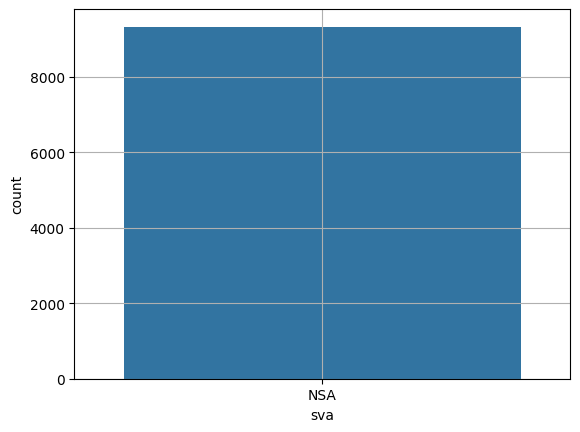

--------------------------------------------------
test



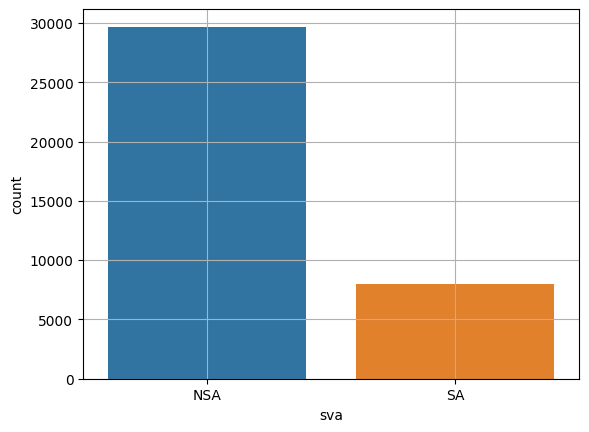

--------------------------------------------------
a



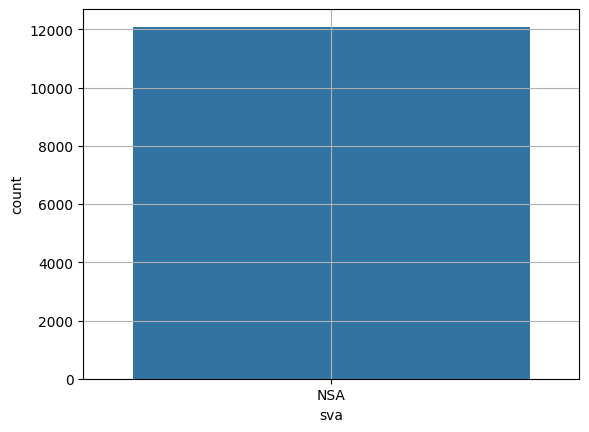

--------------------------------------------------
b



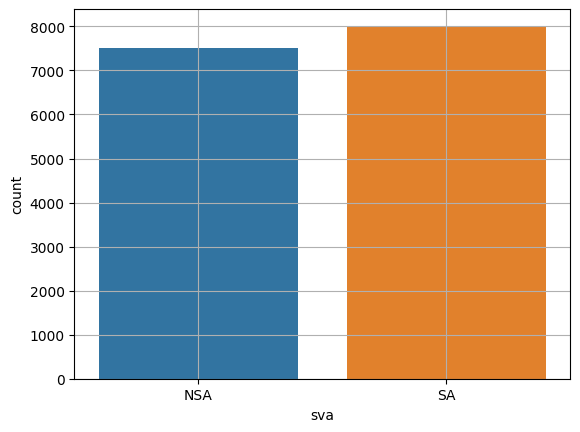

--------------------------------------------------
c



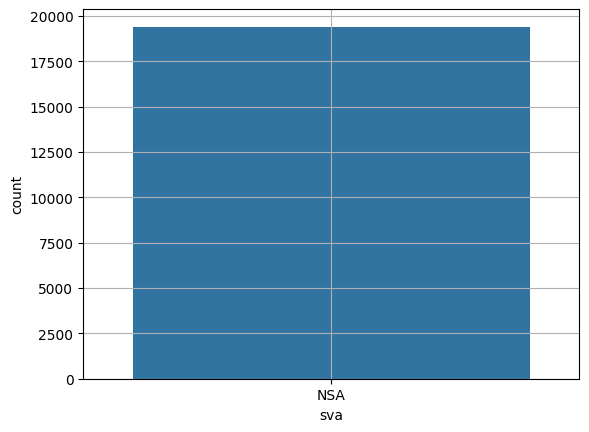

--------------------------------------------------


In [241]:
# train 데이터에 하나의 범주밖에 없어서 유용하게 쓸 수 없는 변수로 판단된다.
for name, data in zip(['train', 'test', 'a', 'b', 'c'],[train, test, a, b, c]):
    print(f'{name}\n')
    eda1_c('sva', data)
    print('-' * 50)

## 추가 아이디어 - sequence 화
- 각 ticketno 별로 하나의 데이터만이 존재하는 것이 아니라 여러개의 데이터가 존재 할 수 있다.
- alarmtime의 순서대로 데이터를 나열하여 sequence데이터로써 모델에 학습시키는 것이 데이터의 숨겨진 의미를 찾아내는 하나의 방법이 될 수 있다.

In [242]:
train.groupby(['ticketno'], group_keys=True ,as_index=True)['root_cause_type'].value_counts().index

MultiIndex([(14753084, 'PowerFail'),
            (14771766, 'PowerFail'),
            (14777089, 'PowerFail'),
            (14790052, 'PowerFail'),
            (14879922, 'PowerFail'),
            (14901137, 'PowerFail'),
            (14919180, 'PowerFail'),
            (14922559, 'PowerFail'),
            (14999487,  'UnitFail'),
            (15036874,  'UnitFail'),
            ...
            (21788287,   'LinkCut'),
            (21788289,   'LinkCut'),
            (21788291,   'LinkCut'),
            (21788294,   'LinkCut'),
            (21790319,   'LinkCut'),
            (21792877,   'LinkCut'),
            (21793984,   'LinkCut'),
            (21799077,   'LinkCut'),
            (21809789,   'LinkCut'),
            (21811213,   'LinkCut')],
           names=['ticketno', 'root_cause_type'], length=1114)

In [243]:
train.groupby(['ticketno'], group_keys=True, as_index=False).apply(lambda x : x)

ticketno        alarmno                 alarmtime  alarmlevel  \
0    1085  14753084      868125045 2022-12-02 13:13:48+09:00           4   
     1086  14753084      868125047 2022-12-02 13:13:48+09:00           7   
     1087  14753084      868125046 2022-12-02 13:13:48+09:00           4   
     1088  14753084      868125048 2022-12-02 13:13:48+09:00           7   
     1089  14753084      868125049 2022-12-02 13:13:48+09:00           7   
...             ...            ...                       ...         ...   
1112 9311  21809789  1671888328403 2022-12-24 22:27:42+09:00           7   
     9319  21809789  1671974758375 2022-12-25 22:28:14+09:00           7   
1113 9316  21811213  1671891486281 2022-12-24 23:20:21+09:00           7   
     9320  21811213  1671978167736 2022-12-25 23:25:03+09:00           7   
     9321  21811213  1671979461271 2022-12-25 23:46:37+09:00           7   

          alarmmsg_original  site sysname  unit  slot  port  ... alarmday  \
0    1085          PSU-FAIL  ABNE    absb  EQPT   NaN   NaN  ...        2   
     1086     ETH-LINK-FAIL  ABNE    absb  EQPT   3.0   5.0  ...        2   
     1087          PSU-FAIL  ABNE    absb  EQPT   NaN   NaN  ...        2   
     1088     ETH-LINK-FAIL  ABNE    absb  EQPT   3.0   6.0  ...        2   
     1089     ETH-LINK-FAIL  ABNE    absb  EQPT   3.0   8.0  ...        2   
...                     ...   ...     ...   ...   ...   ...  ...      ...   
1112 9311           OPT-LOS  ADKA    aeaq  EQPT   3.0   3.0  ...       24   
     9319           OPT-LOS  ADKA    aeaq  EQPT   3.0   3.0  ...       25   
1113 9316           OPT-LOS  ABZO    acie  EQPT   5.0   6.0  ...       24   
     9320           OPT-LOS  ABZO    acie  EQPT   5.0   6.0  ...       25   
     9321           OPT-LOS  ABZO    acie  EQPT   5.0   6.0  ...       25   

          alarmhour site0  site1  site2  site3 sysname0 sysname1 sysname2  \
0    1085        13     A      B      N      E        a        b        s   
     1086        13     A      B      N      E        a        b        s   
     1087        13     A      B      N      E        a        b        s   
     1088        13     A      B      N      E        a        b        s   
     1089        13     A      B      N      E        a        b        s   
...             ...   ...    ...    ...    ...      ...      ...      ...   
1112 9311        22     A      D      K      A        a        e        a   
     9319        22     A      D      K      A        a        e        a   
1113 9316        23     A      B      Z      O        a        c        i   
     9320        23     A      B      Z      O        a        c        i   
     9321        23     A      B      Z      O        a        c        i   

          sysname3  
0    1085        b  
     1086        b  
     1087        b  
     1088        b  
     1089        b  
...            ...  
1112 9311        q  
     9319        q  
1113 9316        e  
     9320        e  
     9321        e  

[9322 rows x 24 columns]

In [244]:
# 모든 ticketno에 대하여 한 종류의 타겟 값을 가지고 있음이 확인된다.
Counter(train.groupby(['ticketno'], group_keys=True ,as_index=True)['root_cause_type'].value_counts().index).most_common()

[((14753084, 'PowerFail'), 1),
 ((14771766, 'PowerFail'), 1),
 ((14777089, 'PowerFail'), 1),
 ((14790052, 'PowerFail'), 1),
 ((14879922, 'PowerFail'), 1),
 ((14901137, 'PowerFail'), 1),
 ((14919180, 'PowerFail'), 1),
 ((14922559, 'PowerFail'), 1),
 ((14999487, 'UnitFail'), 1),
 ((15036874, 'UnitFail'), 1),
 ((15056855, 'PowerFail'), 1),
 ((15072686, 'PowerFail'), 1),
 ((15098278, 'PowerFail'), 1),
 ((15111389, 'PowerFail'), 1),
 ((15111424, 'PowerFail'), 1),
 ((15120696, 'PowerFail'), 1),
 ((15134727, 'PowerFail'), 1),
 ((15176796, 'PowerFail'), 1),
 ((15176832, 'PowerFail'), 1),
 ((15176875, 'PowerFail'), 1),
 ((15185912, 'PowerFail'), 1),
 ((15191902, 'PowerFail'), 1),
 ((15352940, 'UnitFail'), 1),
 ((15367349, 'UnitFail'), 1),
 ((15380642, 'PowerFail'), 1),
 ((15380644, 'PowerFail'), 1),
 ((15382789, 'PowerFail'), 1),
 ((15428377, 'PowerFail'), 1),
 ((15428666, 'PowerFail'), 1),
 ((15432446, 'PowerFail'), 1),
 ((15457130, 'PowerFail'), 1),
 ((15457154, 'PowerFail'), 1),
 ((15473423,

# Feature Engineering
- 분석 결과를 가지고 변수에 적용시킬 전처리 함수는 다음과 같다.

In [245]:
target = 'root_cause_type'

def feature_engineering(data):
    '''
    params
        data : DataFrame - feature engineering의 대상이 되는 데이터
    return
        DataFrame
    '''
    # ticketno column을 int64로 변경
    temp = deepcopy(data)
    temp['ticketno'] = temp['ticketno'].astype('int64')

    # ticketno, alarmno를 로그변환
    temp['ticketno_log1p'] = np.log1p(temp['ticketno'])
    temp['alarmno_log1p'] = np.log1p(temp['alarmno'])

    # alarmtime column을 datetime64로 변경
    tz_pytz = pytz.timezone('Asia/Seoul')
    temp['alarmtime'] = pd.to_datetime(temp['alarmtime'], unit='ns', utc=True).dt.tz_convert('Asia/Seoul')

    # alarmlevel을 범주형 데이터로 취급
    temp['alarmlevel'] = temp['alarmlevel'].astype('object')

    # site & sysname 알파벳 별로 분리
    site_col_dict = {}
    for i in range(4):
        site_col_dict[f'site{i}'] = []


    for idx, value in temp['site'].items():
        for num, each_char in enumerate(value):
            site_col_dict[f'site{num}'].append(each_char)
    site_df = pd.DataFrame(site_col_dict)

    sysname_col_dict = {}
    for i in range(4):
        sysname_col_dict[f'sysname{i}'] = []


    for idx, value in temp['sysname'].items():
        for num, each_char in enumerate(value):
            sysname_col_dict[f'sysname{num}'].append(each_char)

    sysname_df = pd.DataFrame(sysname_col_dict)
    temp = pd.concat([temp, site_df, sysname_df], axis=1)

    #slot, port의 결측치는 각각 0, 100으로 채운다.
    temp['port'].fillna(0.0, inplace=True)
    temp['slot'].fillna(100.0, inplace=True)

    # port와 slot의 dtype을 int32로 바꾼다
    temp['port'] = temp['port'].astype('int32')
    temp['slot'] = temp['slot'].astype('int32')

    return temp

In [246]:
result = feature_engineering(pd.read_csv(train_path))
result

,ticketno,alarmno,alarmtime,alarmlevel,alarmmsg_original,site,sysname,unit,slot,port,...,ticketno_log1p,alarmno_log1p,site0,site1,site2,site3,sysname0,sysname1,sysname2,sysname3
0,21122633,1669820428245,2022-12-01 00:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3,1,...,16.865856,28.143737,A,C,E,N,a,c,n,t
1,21122633,1669821318728,2022-12-01 00:17:15+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3,1,...,16.865856,28.143738,A,C,E,N,a,c,n,t
2,21122633,1669822214832,2022-12-01 00:32:11+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3,1,...,16.865856,28.143738,A,C,E,N,a,c,n,t
3,21122633,1669823114128,2022-12-01 00:47:10+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3,1,...,16.865856,28.143739,A,C,E,N,a,c,n,t
4,21122633,1669824028082,2022-12-01 01:02:24+09:00,5,ETH-ERR,ACEN,acnt,EQPT,3,1,...,16.865856,28.143739,A,C,E,N,a,c,n,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9317,21774618,1671892499215,2022-12-24 23:37:14+09:00,7,OPT-LOS,AFAA,agow,EQPT,5,5,...,16.896256,28.144977,A,F,A,A,a,g,o,w
9318,15693425,877949375,2022-12-25 10:13:46+09:00,7,OPT-REMOVE,AGFD,aibb,EQPT,1,8,...,16.568752,20.593099,A,G,F,D,a,i,b,b
9319,21809789,1671974758375,2022-12-25 22:28:14+09:00,7,OPT-LOS,ADKA,aeaq,EQPT,3,3,...,16.897870,28.145027,A,D,K,A,a,e,a,q
9320,21811213,1671978167736,2022-12-25 23:25:03+09:00,7,OPT-LOS,ABZO,acie,EQPT,5,6,...,16.897935,28.145029,A,B,Z,O,a,c,i,e


In [247]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype                     
---  ------             --------------  -----                     
 0   ticketno           9322 non-null   int64                     
 1   alarmno            9322 non-null   int64                     
 2   alarmtime          9322 non-null   datetime64[ns, Asia/Seoul]
 3   alarmlevel         9322 non-null   object                    
 4   alarmmsg_original  9322 non-null   object                    
 5   site               9322 non-null   object                    
 6   sysname            9322 non-null   object                    
 7   unit               9322 non-null   object                    
 8   slot               9322 non-null   int32                     
 9   port               9322 non-null   int32                     
 10  sva                9322 non-null   object                    
 11  root_cause_domain